In [1]:
#import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import folium


In [2]:
dataset_dir = 'C:\\Users\\fptsh\\OneDrive - ueh.edu.vn\\Tài liệu\\GitHub\\weather-prediction\\resource\\dataset\\raw'

### LOAD DATA

In [3]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [4]:
humidity = load_data(os.path.join(dataset_dir, 'humidity.csv'))
pressure = load_data(os.path.join(dataset_dir, 'pressure.csv'))
temperature = load_data(os.path.join(dataset_dir, 'temperature.csv'))
wind_direction = load_data(os.path.join(dataset_dir, 'wind_direction.csv'))
wind_speed = load_data(os.path.join(dataset_dir, 'wind_speed.csv'))
city_att = load_data(os.path.join(dataset_dir, 'city_attributes.csv'))
weather_desc = load_data(os.path.join(dataset_dir, 'weather_description.csv'))

#### SHOW DATA

In [5]:
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [6]:
temperature.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [7]:
pressure.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [8]:
wind_direction.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [9]:
wind_speed.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0


In [10]:
city_att.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [11]:
weather_desc.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


#### DATA TRANSFORMATION

In [12]:
def time_transformation(feature):
    feature = feature.copy()
    # Đảm bảo datetime ở dạng datetime
    feature['datetime'] = pd.to_datetime(feature['datetime'])

    # Loại bỏ dòng có datetime là 2012-10-01 12:00:00
    feature = feature[feature['datetime'] != pd.to_datetime("2012-10-01 12:00:00")]

    # Thêm cột month (định dạng month-year)
    feature['month'] = feature['datetime'].dt.to_period('M')

    # Forward fill để xử lý missing values
    feature.ffill(inplace=True)

    # Xoá cột datetime cũ
    feature.drop(columns=['datetime'], inplace=True)

    # Nhóm theo tháng và tính trung bình
    feature = feature.groupby('month').mean(numeric_only=True).reset_index()

    return feature

### DATA DESCRIPTION

#### City

In [13]:
city_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       36 non-null     object 
 1   Country    36 non-null     object 
 2   Latitude   36 non-null     float64
 3   Longitude  36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.3+ KB


In [14]:
m = folium.Map(location=[39.5, -98.35], zoom_start=4, tiles='CartoDB positron')

# Thêm marker cho từng thành phố (không popup)
for _, row in city_att.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Lưu và hiển thị bản đồ
m.save('cities_only_map.html')

#### Weather Description

In [15]:
weather_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   datetime           45253 non-null  object
 1   Vancouver          44460 non-null  object
 2   Portland           45252 non-null  object
 3   San Francisco      44460 non-null  object
 4   Seattle            45252 non-null  object
 5   Los Angeles        45252 non-null  object
 6   San Diego          45252 non-null  object
 7   Las Vegas          45252 non-null  object
 8   Phoenix            45252 non-null  object
 9   Albuquerque        45252 non-null  object
 10  Denver             45252 non-null  object
 11  San Antonio        45252 non-null  object
 12  Dallas             45252 non-null  object
 13  Houston            45252 non-null  object
 14  Kansas City        45252 non-null  object
 15  Minneapolis        45252 non-null  object
 16  Saint Louis        45252 non-null  objec

#### Humidity

In [ ]:
# Kiểm tra kiểu dữ liệu và giá trị thiếu
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Vancouver          43427 non-null  float64  
 1   Portland           44804 non-null  float64  
 2   San Francisco      44311 non-null  float64  
 3   Seattle            44964 non-null  float64  
 4   Los Angeles        45101 non-null  float64  
 5   San Diego          44909 non-null  float64  
 6   Las Vegas          44411 non-null  float64  
 7   Phoenix            43945 non-null  float64  
 8   Albuquerque        44543 non-null  float64  
 9   Denver             43445 non-null  float64  
 10  San Antonio        44689 non-null  float64  
 11  Dallas             44934 non-null  float64  
 12  Houston            45132 non-null  float64  
 13  Kansas City        44741 non-null  float64  
 14  Minneapolis        44743 non-null  float64  
 15  Saint Louis        43964 non-null  f

In [51]:
humidity = time_transformation(humidity)

In [52]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   month              62 non-null     period[M]
 1   Vancouver          62 non-null     float64  
 2   Portland           62 non-null     float64  
 3   San Francisco      62 non-null     float64  
 4   Seattle            62 non-null     float64  
 5   Los Angeles        62 non-null     float64  
 6   San Diego          62 non-null     float64  
 7   Las Vegas          62 non-null     float64  
 8   Phoenix            62 non-null     float64  
 9   Albuquerque        62 non-null     float64  
 10  Denver             62 non-null     float64  
 11  San Antonio        62 non-null     float64  
 12  Dallas             62 non-null     float64  
 13  Houston            62 non-null     float64  
 14  Kansas City        62 non-null     float64  
 15  Minneapolis        62 non-null     float64

In [18]:
# Mô tả thống kê cho toàn bộ thành phố (bỏ cột date)
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']

desc_stats = humidity[cities].describe()
print("\nHumidity:")
print(desc_stats)


Humidity:
          Vancouver  San Francisco       Phoenix      New York
count  43427.000000   44311.000000  43945.000000  43629.000000
mean      81.895480      76.875042     37.484424     66.642417
std       14.522221      17.396016     21.662728     19.874727
min       12.000000       6.000000      5.000000     10.000000
25%       73.000000      68.000000     21.000000     51.000000
50%       86.000000      81.000000     32.000000     68.000000
75%       93.000000      89.000000     50.000000     83.000000
max      100.000000     100.000000    100.000000    100.000000


#### Pressure

In [54]:
pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          41019 non-null  float64
 2   Portland           45249 non-null  float64
 3   San Francisco      44438 non-null  float64
 4   Seattle            45240 non-null  float64
 5   Los Angeles        45001 non-null  float64
 6   San Diego          45078 non-null  float64
 7   Las Vegas          45165 non-null  float64
 8   Phoenix            44659 non-null  float64
 9   Albuquerque        44797 non-null  float64
 10  Denver             44710 non-null  float64
 11  San Antonio        45236 non-null  float64
 12  Dallas             45193 non-null  float64
 13  Houston            45244 non-null  float64
 14  Kansas City        45132 non-null  float64
 15  Minneapolis        45236 non-null  float64
 16  Saint Louis        451

In [55]:
pressure = time_transformation(pressure)

In [57]:
pressure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   month              62 non-null     period[M]
 1   Vancouver          62 non-null     float64  
 2   Portland           62 non-null     float64  
 3   San Francisco      62 non-null     float64  
 4   Seattle            62 non-null     float64  
 5   Los Angeles        62 non-null     float64  
 6   San Diego          62 non-null     float64  
 7   Las Vegas          62 non-null     float64  
 8   Phoenix            62 non-null     float64  
 9   Albuquerque        62 non-null     float64  
 10  Denver             62 non-null     float64  
 11  San Antonio        62 non-null     float64  
 12  Dallas             62 non-null     float64  
 13  Houston            62 non-null     float64  
 14  Kansas City        62 non-null     float64  
 15  Minneapolis        62 non-null     float64

In [19]:
# Mô tả thống kê cho toàn bộ thành phố (bỏ cột date)
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']


desc_stats = pressure[cities].describe()
print("\nPresure (Áp suất không khí):")
print(desc_stats)


Presure (Áp suất không khí):
          Vancouver  San Francisco       Phoenix      New York
count  41019.000000   44438.000000  44659.000000  44212.000000
mean    1018.130915    1018.843872   1013.297342   1017.018977
std       15.792425       7.333477     11.988782     10.125738
min      807.000000     985.000000    884.000000    959.000000
25%     1012.000000    1014.000000   1009.000000   1012.000000
50%     1017.000000    1018.000000   1014.000000   1017.000000
75%     1022.000000    1023.000000   1020.000000   1023.000000
max     1100.000000    1044.000000   1076.000000   1052.000000


#### Temperature

In [59]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

In [60]:
temperature = time_transformation(temperature)
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   month              62 non-null     period[M]
 1   Vancouver          62 non-null     float64  
 2   Portland           62 non-null     float64  
 3   San Francisco      62 non-null     float64  
 4   Seattle            62 non-null     float64  
 5   Los Angeles        62 non-null     float64  
 6   San Diego          62 non-null     float64  
 7   Las Vegas          62 non-null     float64  
 8   Phoenix            62 non-null     float64  
 9   Albuquerque        62 non-null     float64  
 10  Denver             62 non-null     float64  
 11  San Antonio        62 non-null     float64  
 12  Dallas             62 non-null     float64  
 13  Houston            62 non-null     float64  
 14  Kansas City        62 non-null     float64  
 15  Minneapolis        62 non-null     float64

In [20]:
# Mô tả thống kê cho toàn bộ thành phố (bỏ cột date)
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']

desc_stats = temperature[cities].describe()
print("\nTemperature (Nhiệt độ):")
print(desc_stats)


Temperature (Nhiệt độ):
          Vancouver  San Francisco       Phoenix      New York
count  44458.000000   44460.000000  45250.000000  44460.000000
mean     283.862654     288.155821    295.493358    285.400406
std        6.640131       5.332862      9.916743     10.220932
min      245.150000     272.300000    266.059000    250.774000
25%      279.160000     284.670000    287.680000    277.370000
50%      283.450000     287.610000    295.586667    285.870000
75%      288.600785     291.015167    303.050000    293.760000
max      307.000000     313.620000    321.220000    310.240000


#### Wind direction

In [64]:
wind_direction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44459 non-null  float64
 4   Seattle            45252 non-null  float64
 5   Los Angeles        45252 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45248 non-null  float64
 8   Phoenix            45252 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45252 non-null  float64
 13  Houston            45251 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45252 non-null  float64
 16  Saint Louis        452

In [65]:
wind_direction = time_transformation(wind_direction)
wind_direction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   month              62 non-null     period[M]
 1   Vancouver          62 non-null     float64  
 2   Portland           62 non-null     float64  
 3   San Francisco      62 non-null     float64  
 4   Seattle            62 non-null     float64  
 5   Los Angeles        62 non-null     float64  
 6   San Diego          62 non-null     float64  
 7   Las Vegas          62 non-null     float64  
 8   Phoenix            62 non-null     float64  
 9   Albuquerque        62 non-null     float64  
 10  Denver             62 non-null     float64  
 11  San Antonio        62 non-null     float64  
 12  Dallas             62 non-null     float64  
 13  Houston            62 non-null     float64  
 14  Kansas City        62 non-null     float64  
 15  Minneapolis        62 non-null     float64

In [21]:
# Mô tả thống kê cho toàn bộ thành phố (bỏ cột date)
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']


desc_stats = wind_direction[cities].describe()
print("\nWind Direction (Hướng gió):")
print(desc_stats)


Wind Direction (Hướng gió):
          Vancouver  San Francisco       Phoenix      New York
count  44458.000000   44459.000000  45252.000000  44460.000000
mean     159.892978     209.299489    168.564351    196.250247
std       98.163221      95.589055    107.533094    107.433676
min        0.000000       0.000000      0.000000      0.000000
25%       80.000000     160.000000     74.000000    104.000000
50%      140.000000     232.000000    180.000000    220.000000
75%      236.000000     280.000000    250.000000    289.000000
max      360.000000     360.000000    360.000000    360.000000


#### Wind speed

In [67]:
wind_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44459 non-null  float64
 4   Seattle            45252 non-null  float64
 5   Los Angeles        45252 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45238 non-null  float64
 8   Phoenix            45251 non-null  float64
 9   Albuquerque        45249 non-null  float64
 10  Denver             45251 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45251 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45250 non-null  float64
 16  Saint Louis        452

In [68]:
wind_speed = time_transformation(wind_speed)
wind_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   month              62 non-null     period[M]
 1   Vancouver          62 non-null     float64  
 2   Portland           62 non-null     float64  
 3   San Francisco      62 non-null     float64  
 4   Seattle            62 non-null     float64  
 5   Los Angeles        62 non-null     float64  
 6   San Diego          62 non-null     float64  
 7   Las Vegas          62 non-null     float64  
 8   Phoenix            62 non-null     float64  
 9   Albuquerque        62 non-null     float64  
 10  Denver             62 non-null     float64  
 11  San Antonio        62 non-null     float64  
 12  Dallas             62 non-null     float64  
 13  Houston            62 non-null     float64  
 14  Kansas City        62 non-null     float64  
 15  Minneapolis        62 non-null     float64

In [22]:
# Mô tả thống kê cho toàn bộ thành phố (bỏ cột date)
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']


desc_stats = wind_speed[cities].describe()
print("\nWind speed (Tốc độ gió):")
print(desc_stats)


Wind speed (Tốc độ gió):
          Vancouver  San Francisco       Phoenix      New York
count  44458.000000   44459.000000  45251.000000  44460.000000
mean       2.432746       2.786702      1.909063      3.210954
std        2.004636       2.284011      1.623629      2.189716
min        0.000000       0.000000      0.000000      0.000000
25%        1.000000       1.000000      1.000000      2.000000
50%        2.000000       2.000000      1.000000      3.000000
75%        4.000000       4.000000      3.000000      4.000000
max       25.000000      43.000000     48.000000     25.000000


### TIME SERIES ANALYSIS

#### Humidity

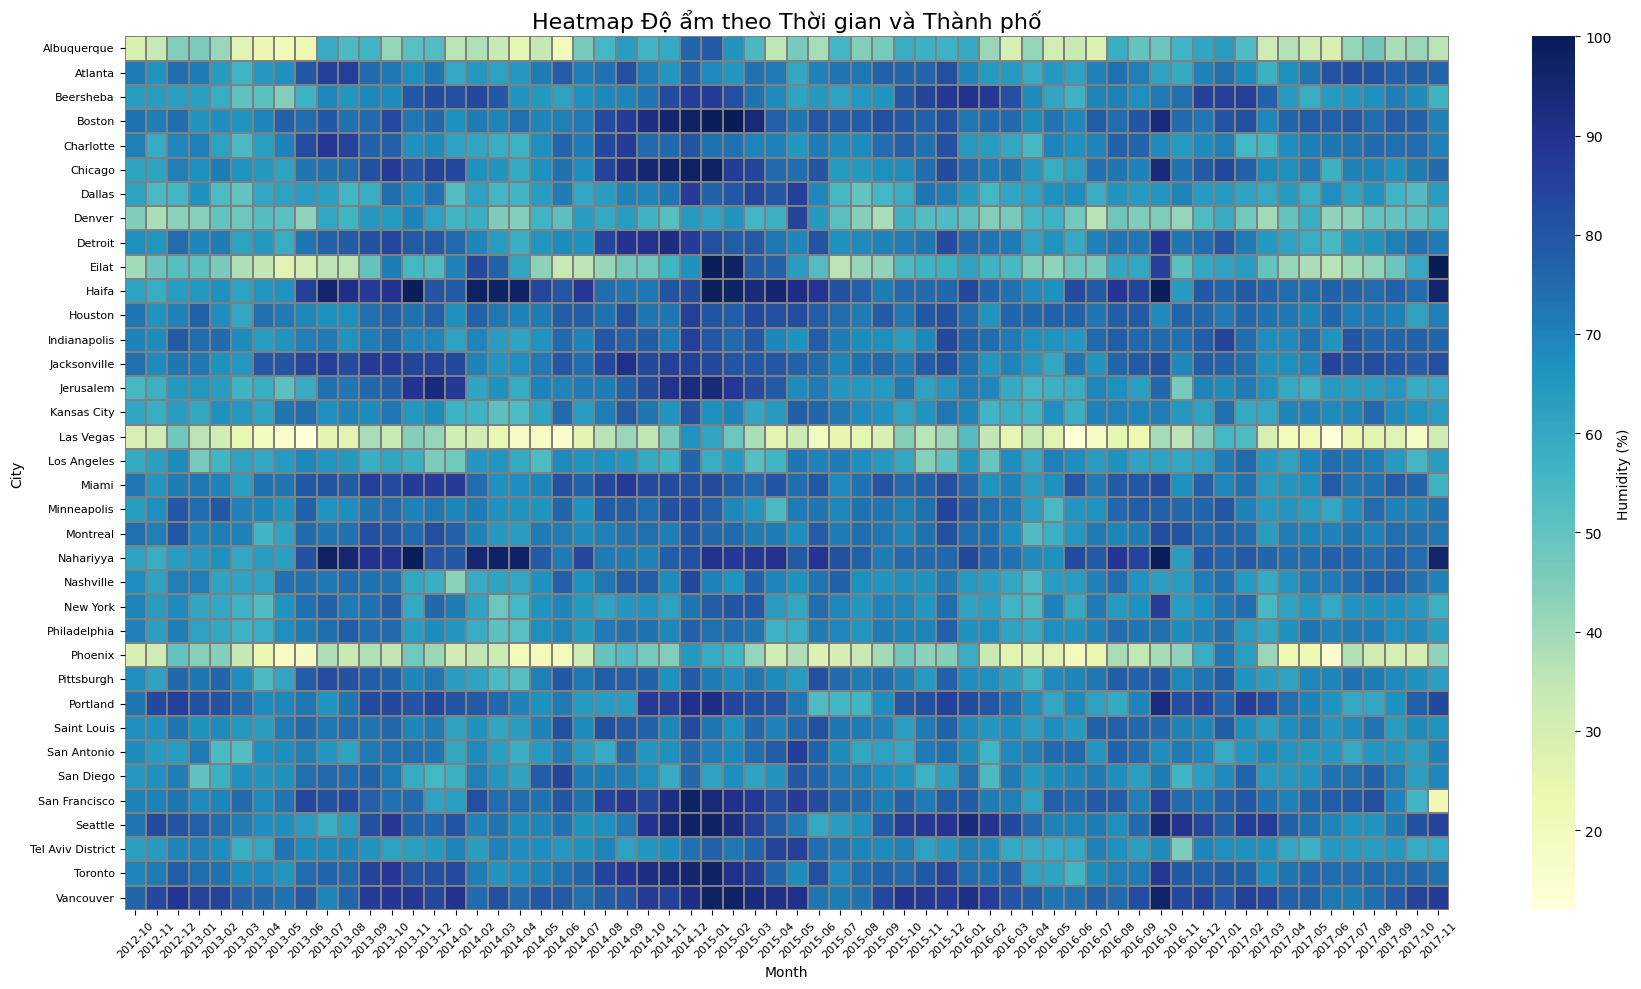

In [72]:
#Heatmap Độ ẩm theo Thời gian và Thành phố
humidity_long = humidity.melt(id_vars='month', var_name='city', value_name='humidity')

heatmap_data = humidity_long.pivot(index='city', columns='month', values='humidity')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Humidity (%)'}, linewidths=0.01, linecolor='gray')

plt.title("Heatmap Độ ẩm theo Thời gian và Thành phố", fontsize=16)
plt.xlabel("Month")
plt.ylabel("City")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

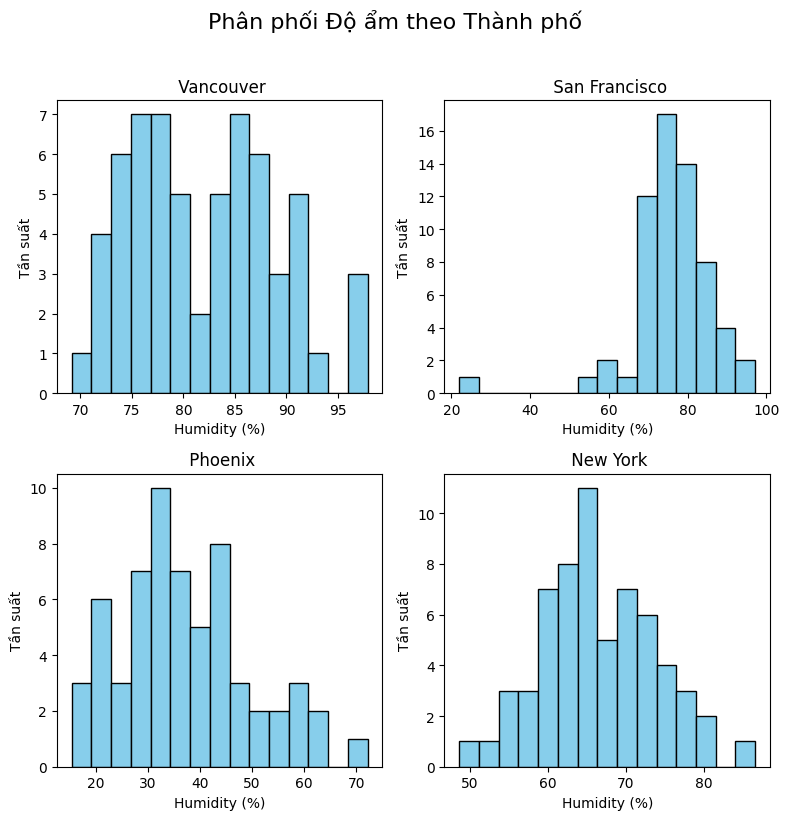

<Figure size 640x480 with 0 Axes>

In [91]:
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']

plt.figure(figsize=(8, 8))
for i, city in enumerate(cities):
    plt.subplot(2, 2, i + 1)
    plt.hist(humidity[city], bins=15, color='skyblue', edgecolor='black')
    plt.title(f' {city}')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Tần suất')

plt.suptitle('Phân phối Độ ẩm theo Thành phố', fontsize=16, y=1.02)  # Tiêu đề chung
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


In [76]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 73.1 kB/s eta 0:02:15
   ---------------------------------------- 0.0/9.8 MB 73.1 kB/s eta 0:02:15
   ---------------------------------------- 0.0/9.8 MB 73.1 kB/s eta 0:02:15
   ---------------------------------------- 0.0/9.8 MB 73.1 kB/s eta 0:02:15
   ---------------------------------------- 0.0/9.8 MB 69.0 kB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

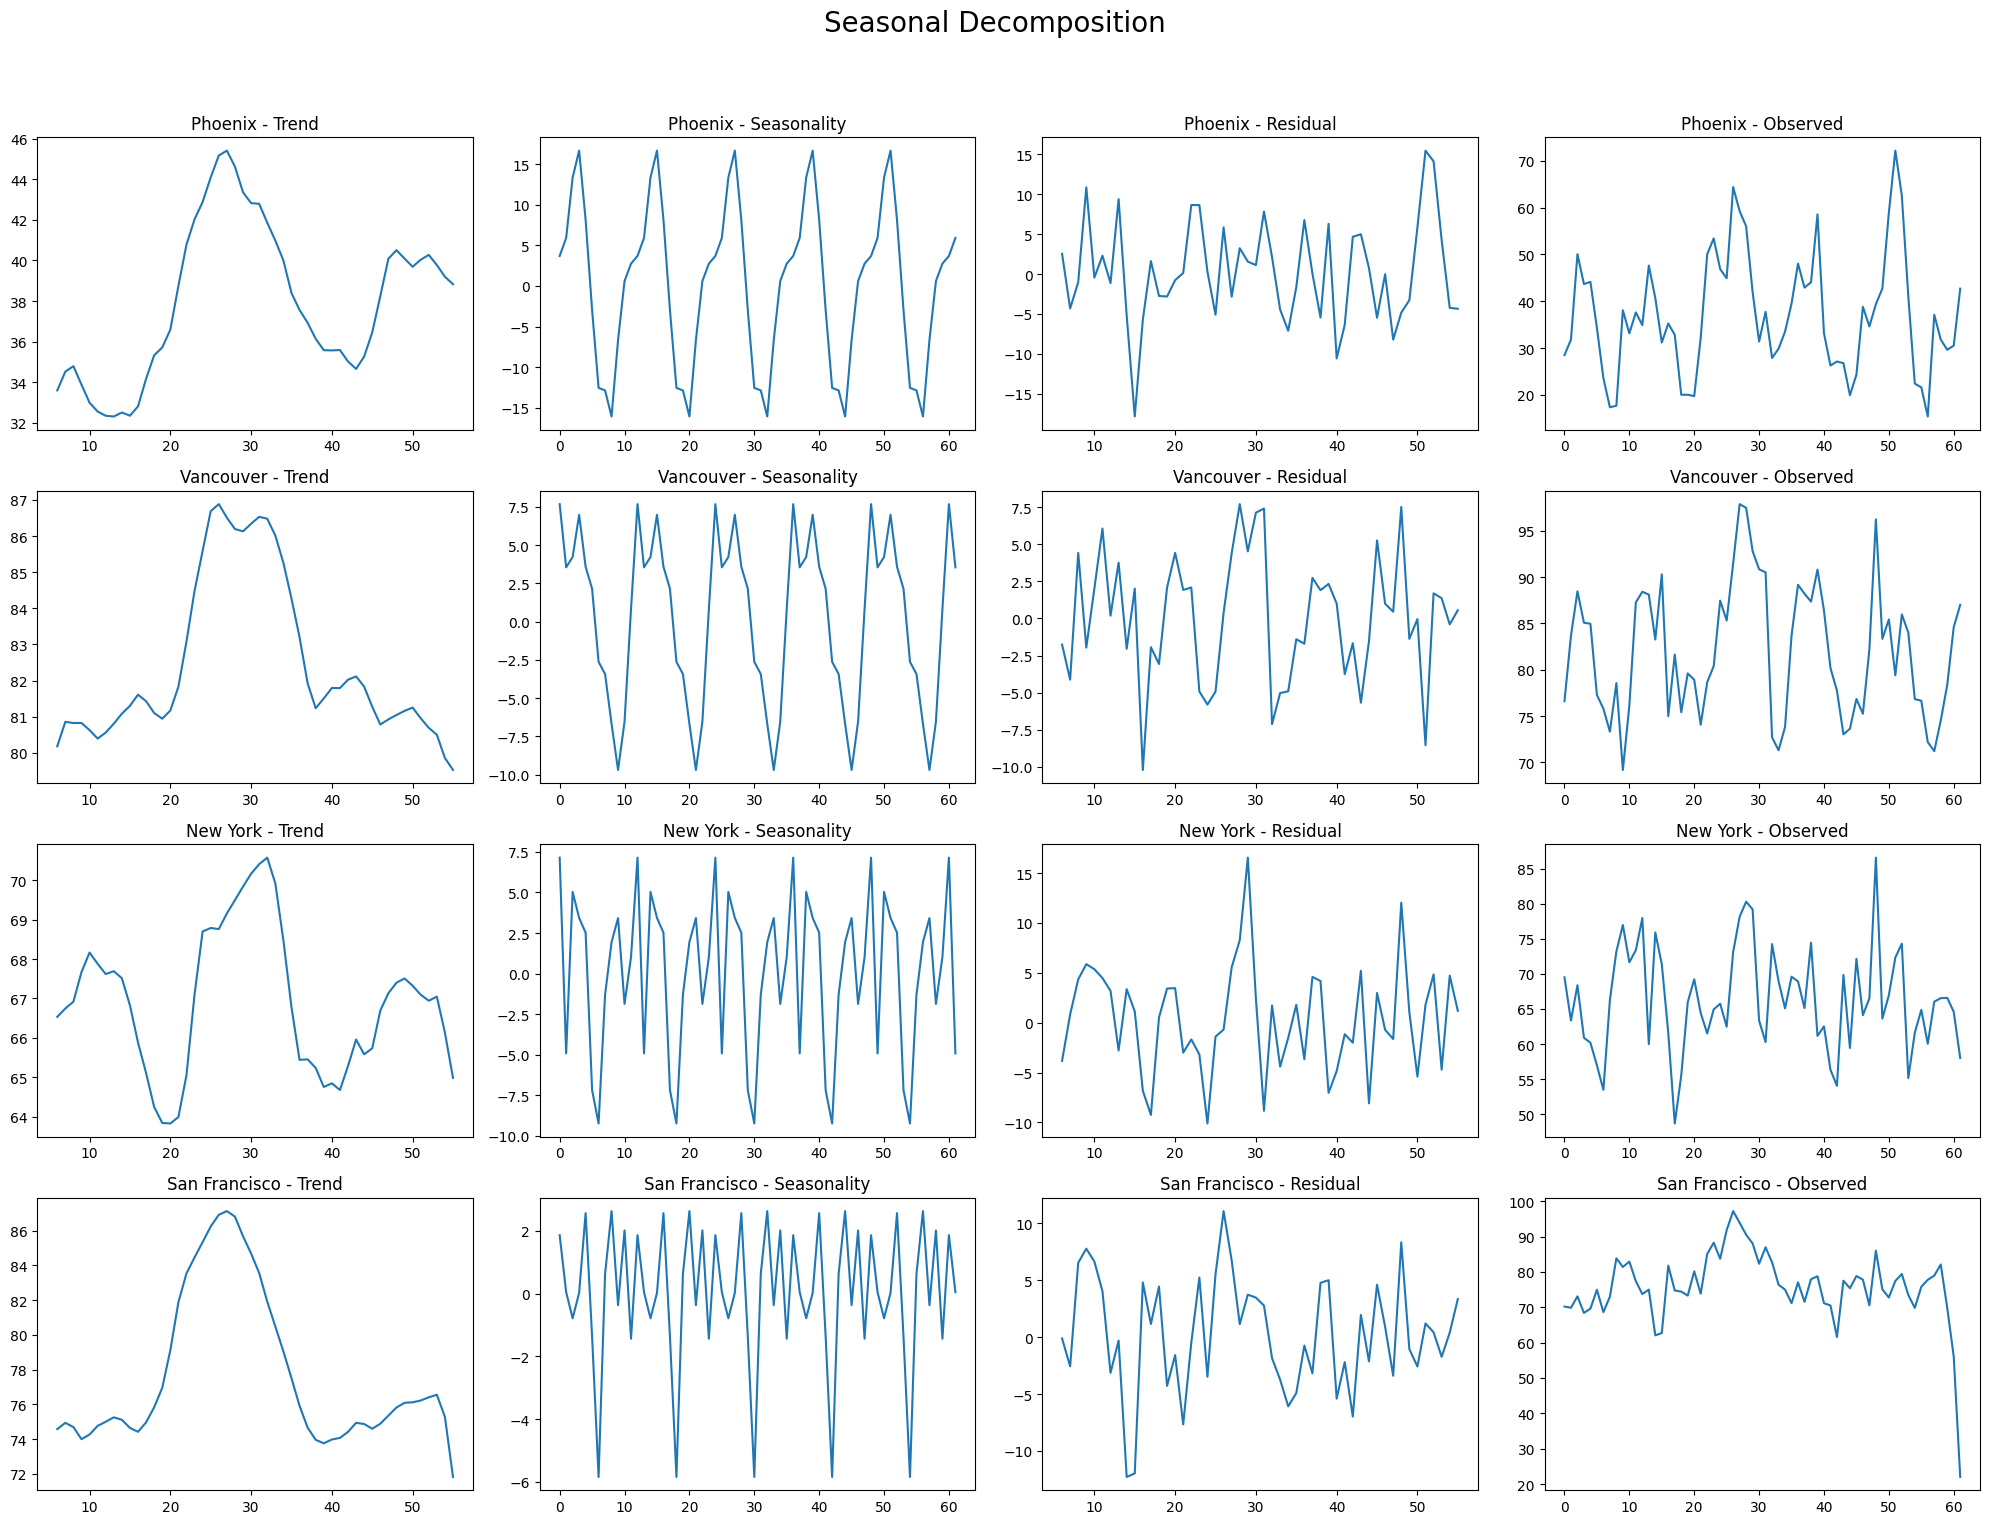

In [ ]:
#Seasonal Decomposition
cities = ['Phoenix', 'Vancouver', 'New York', 'San Francisco']

# Tạo plot
fig, axes = plt.subplots(len(cities), 4, figsize=(20, 16))
fig.suptitle('Seasonal Decomposition', fontsize=20)

for i, city in enumerate(cities):
    ts = humidity[city].dropna()
    result = seasonal_decompose(ts, model='additive', period=12)

    # Vẽ từng thành phần
    result.trend.plot(ax=axes[i, 0], title=f'{city} - Trend')
    result.seasonal.plot(ax=axes[i, 1], title=f'{city} - Seasonality')
    result.resid.plot(ax=axes[i, 2], title=f'{city} - Residual')
    result.observed.plot(ax=axes[i, 3], title=f'{city} - Observed')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Pressure

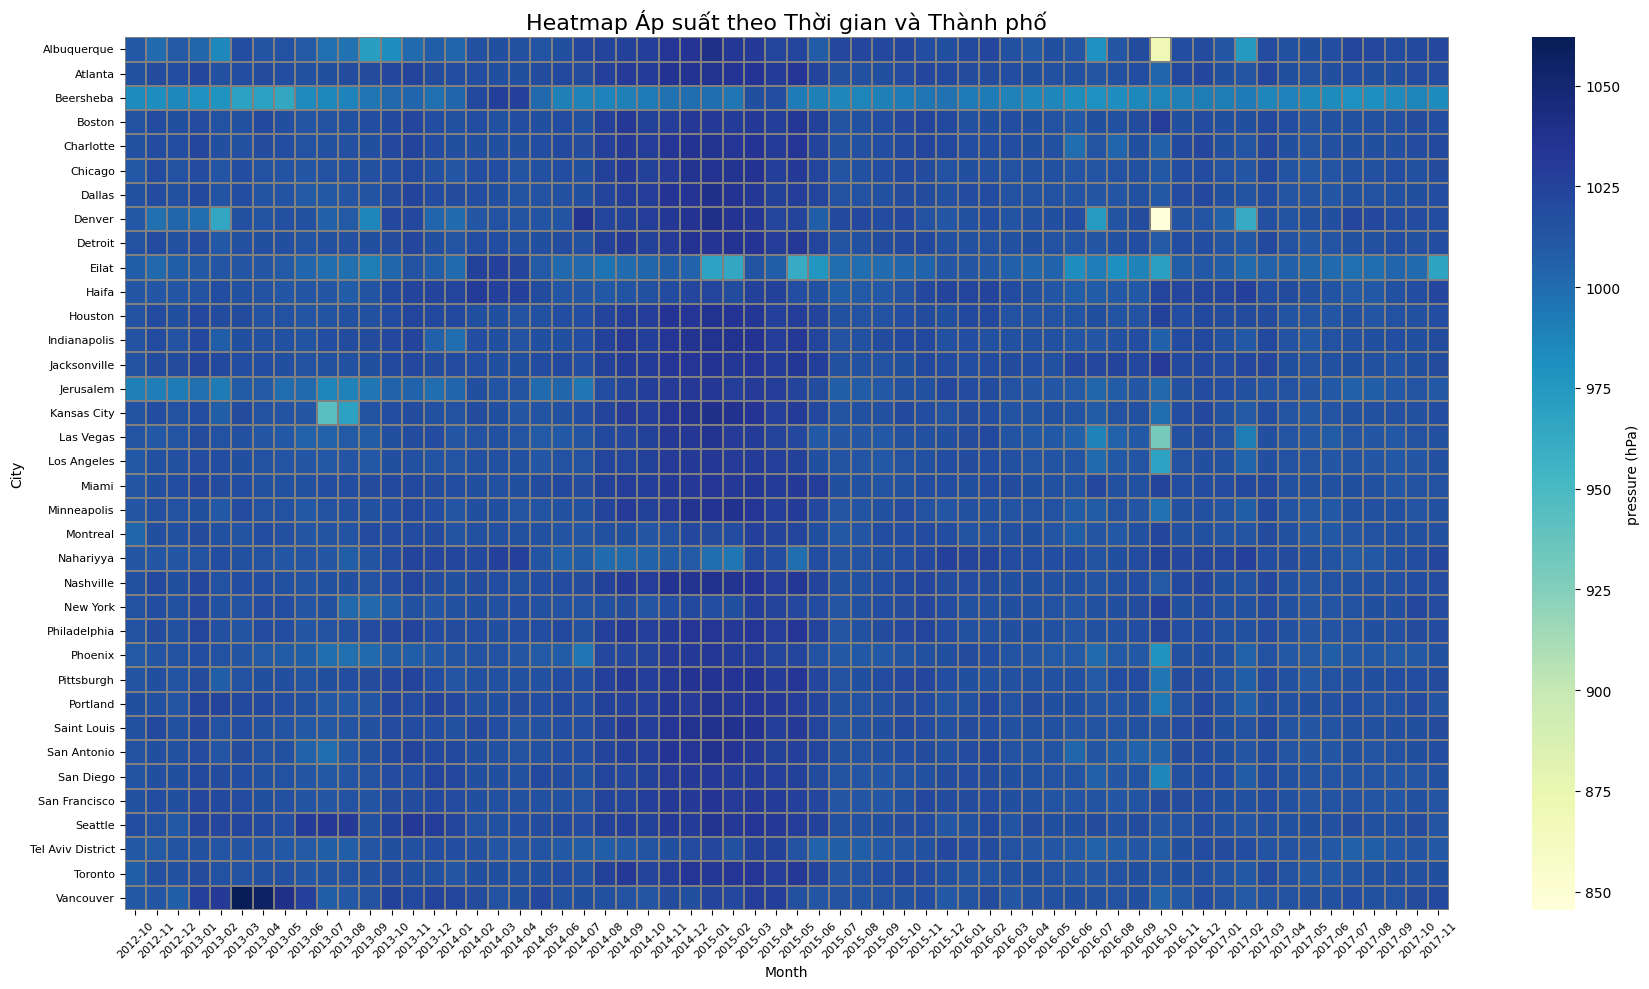

In [88]:
#Heatmap Áp suất không khí theo Thời gian và Thành phố
pressure_long = pressure.melt(id_vars='month', var_name='city', value_name='pressure')

heatmap_data = pressure_long.pivot(index='city', columns='month', values='pressure')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'pressure (hPa)'}, linewidths=0.01, linecolor='gray')

plt.title("Heatmap Áp suất theo Thời gian và Thành phố", fontsize=16)
plt.xlabel("Month")
plt.ylabel("City")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

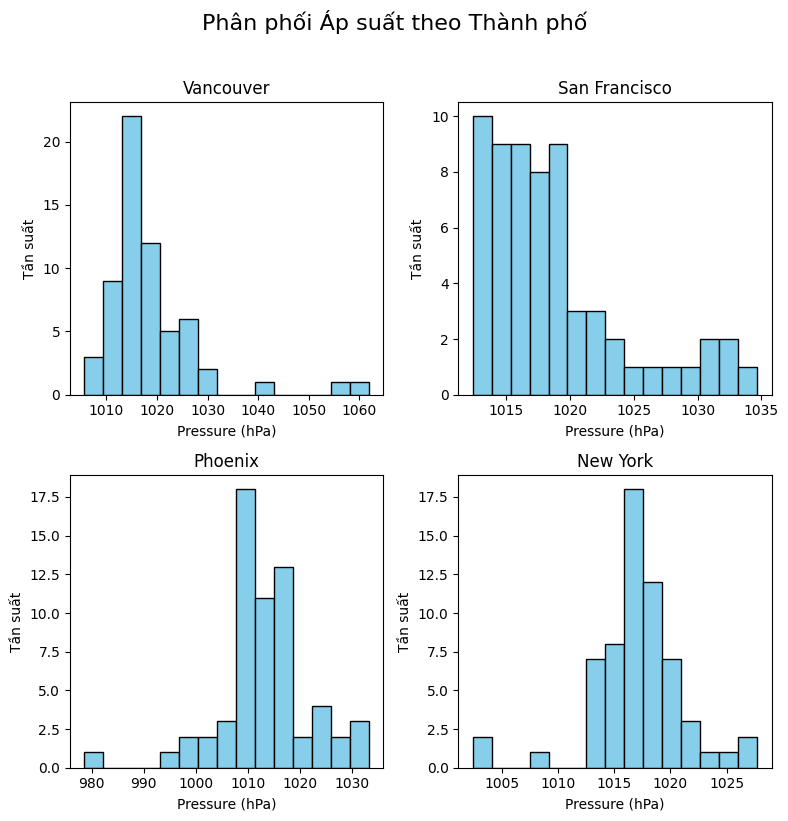

<Figure size 640x480 with 0 Axes>

In [90]:
#Histogram
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']

plt.figure(figsize=(8, 8))
for i, city in enumerate(cities):
    plt.subplot(2, 2, i + 1)
    plt.hist(pressure[city], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'{city}')
    plt.xlabel('Pressure (hPa)')
    plt.ylabel('Tần suất')

plt.suptitle('Phân phối Áp suất theo Thành phố', fontsize=16, y=1.02)  # Tiêu đề chung
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

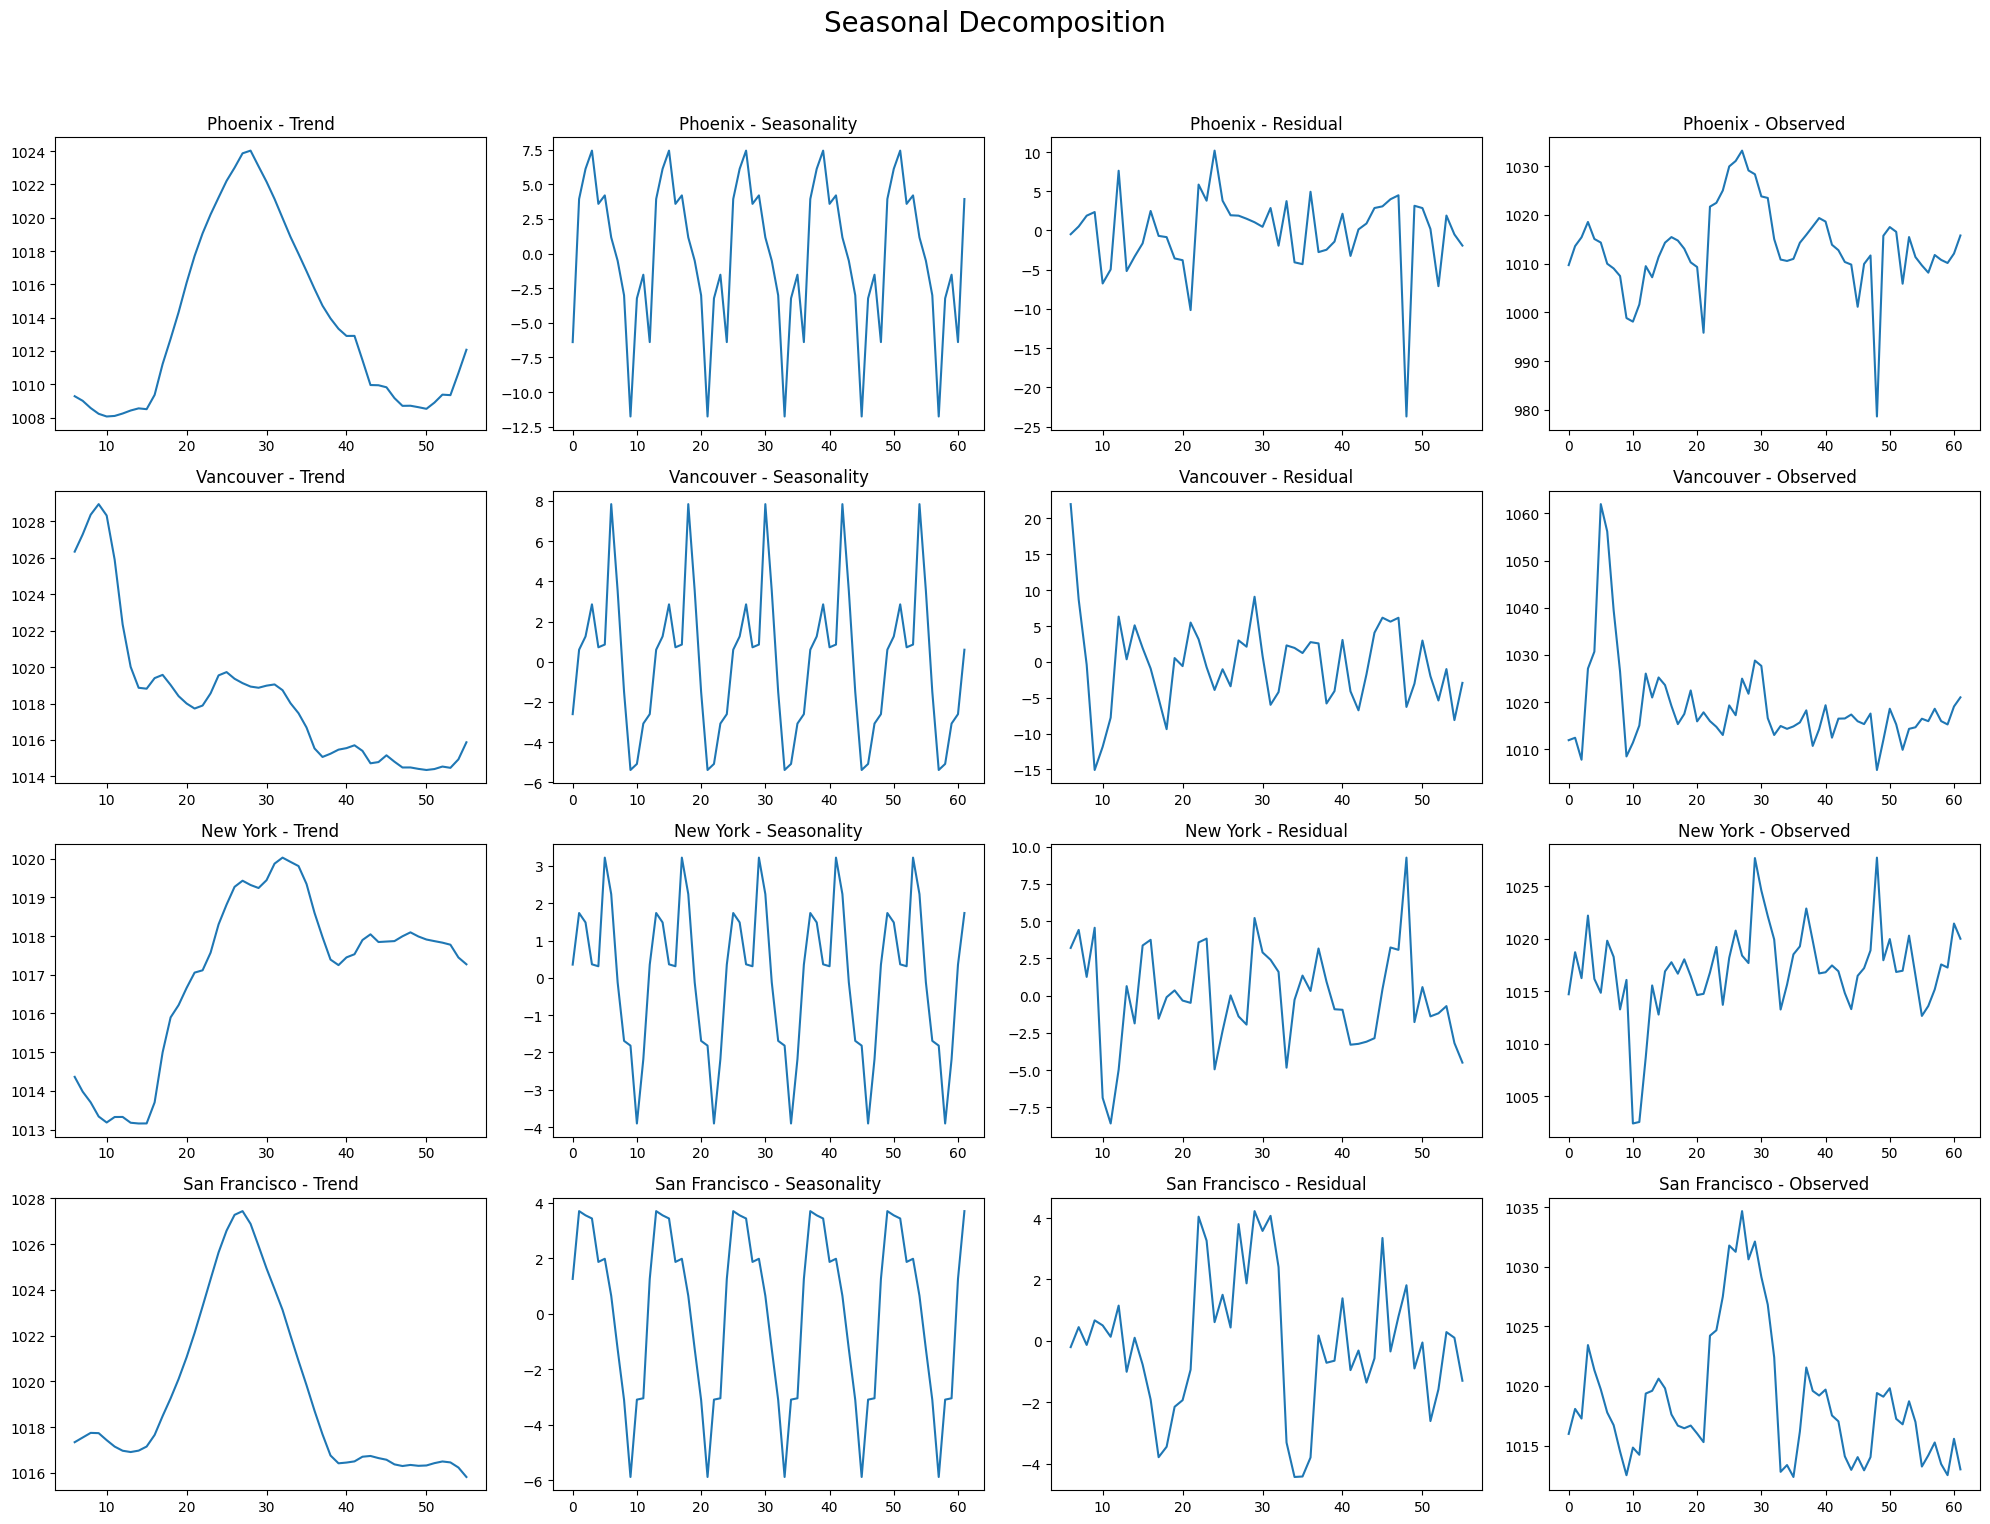

In [92]:
#Seasonal Decomposition
cities = ['Phoenix', 'Vancouver', 'New York', 'San Francisco']

# Tạo plot
fig, axes = plt.subplots(len(cities), 4, figsize=(20, 16))
fig.suptitle('Seasonal Decomposition', fontsize=20)

for i, city in enumerate(cities):
    ts = pressure[city].dropna()
    result = seasonal_decompose(ts, model='additive', period=12)

    # Vẽ từng thành phần
    result.trend.plot(ax=axes[i, 0], title=f'{city} - Trend')
    result.seasonal.plot(ax=axes[i, 1], title=f'{city} - Seasonality')
    result.resid.plot(ax=axes[i, 2], title=f'{city} - Residual')
    result.observed.plot(ax=axes[i, 3], title=f'{city} - Observed')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Temperature


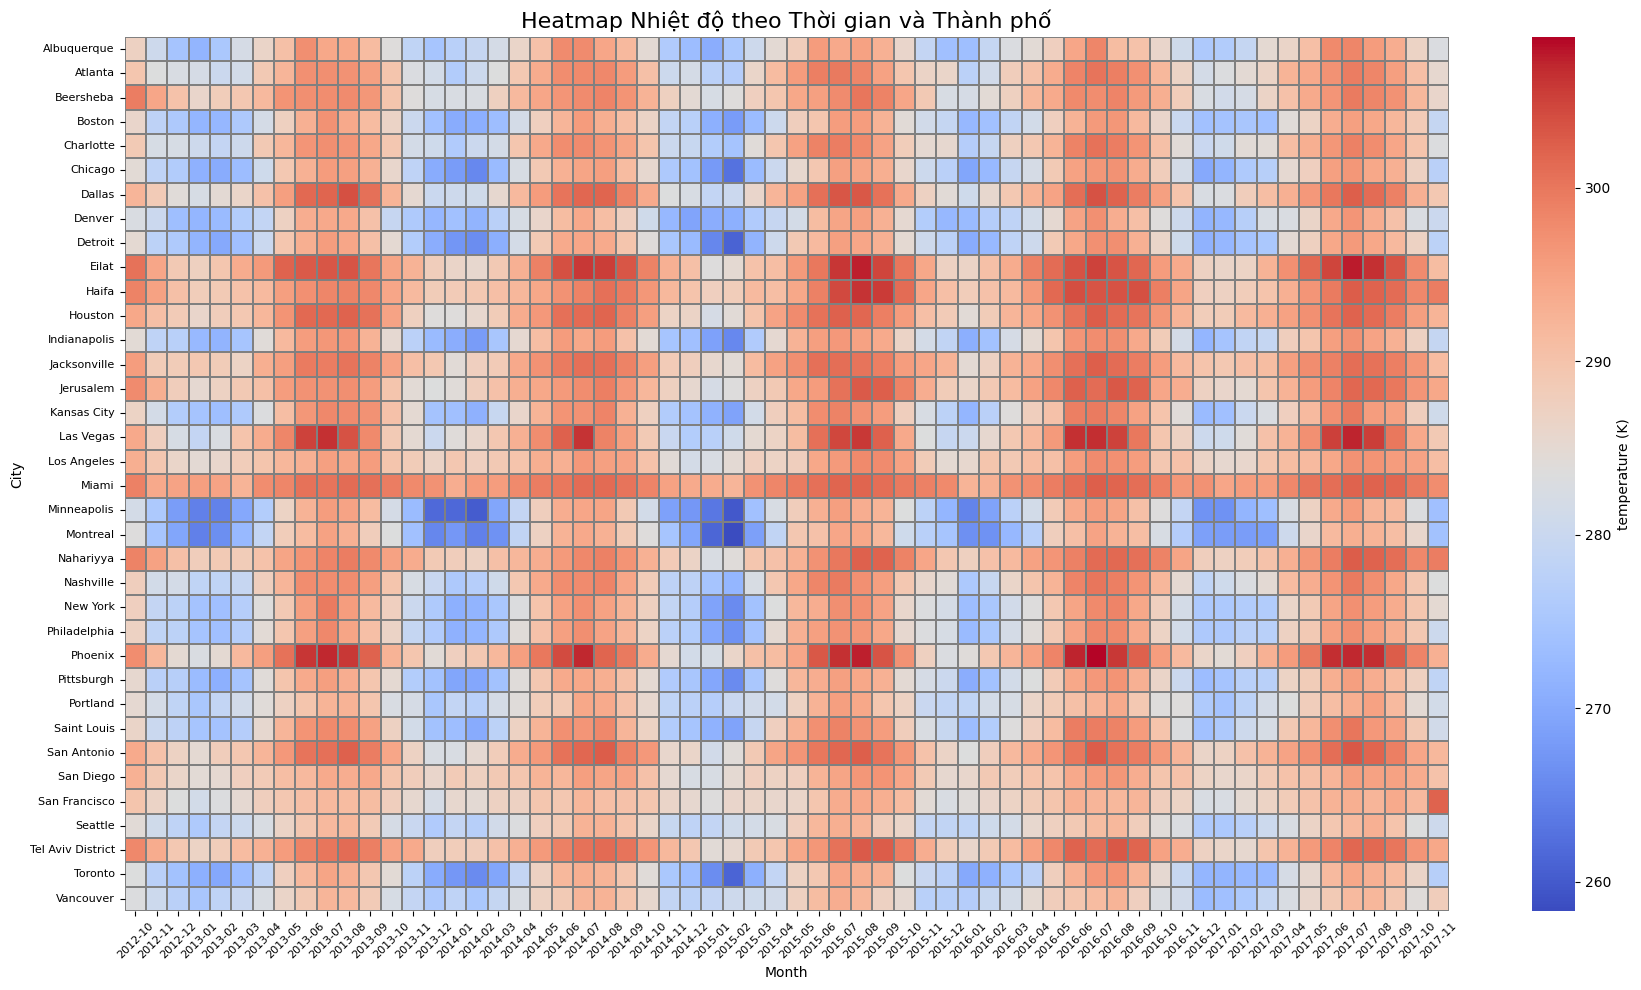

In [95]:
#Heatmap Nhiệt độ theo Thời gian và Thành phố
temperature_long = temperature.melt(id_vars='month', var_name='city', value_name='temperature')

heatmap_data = temperature_long.pivot(index='city', columns='month', values='temperature')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'temperature (K)'}, linewidths=0.01, linecolor='gray')

plt.title("Heatmap Nhiệt độ theo Thời gian và Thành phố", fontsize=16)
plt.xlabel("Month")
plt.ylabel("City")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

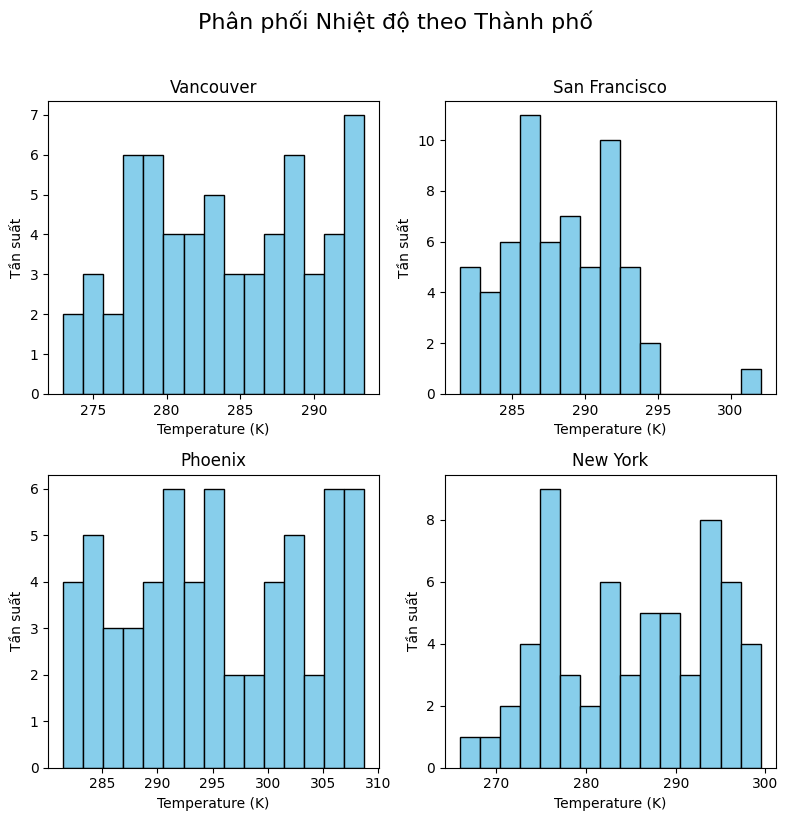

<Figure size 640x480 with 0 Axes>

In [96]:
#Histogram
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']

plt.figure(figsize=(8, 8))
for i, city in enumerate(cities):
    plt.subplot(2, 2, i + 1)
    plt.hist(temperature[city], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'{city}')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Tần suất')

plt.suptitle('Phân phối Nhiệt độ theo Thành phố', fontsize=16, y=1.02)  # Tiêu đề chung
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

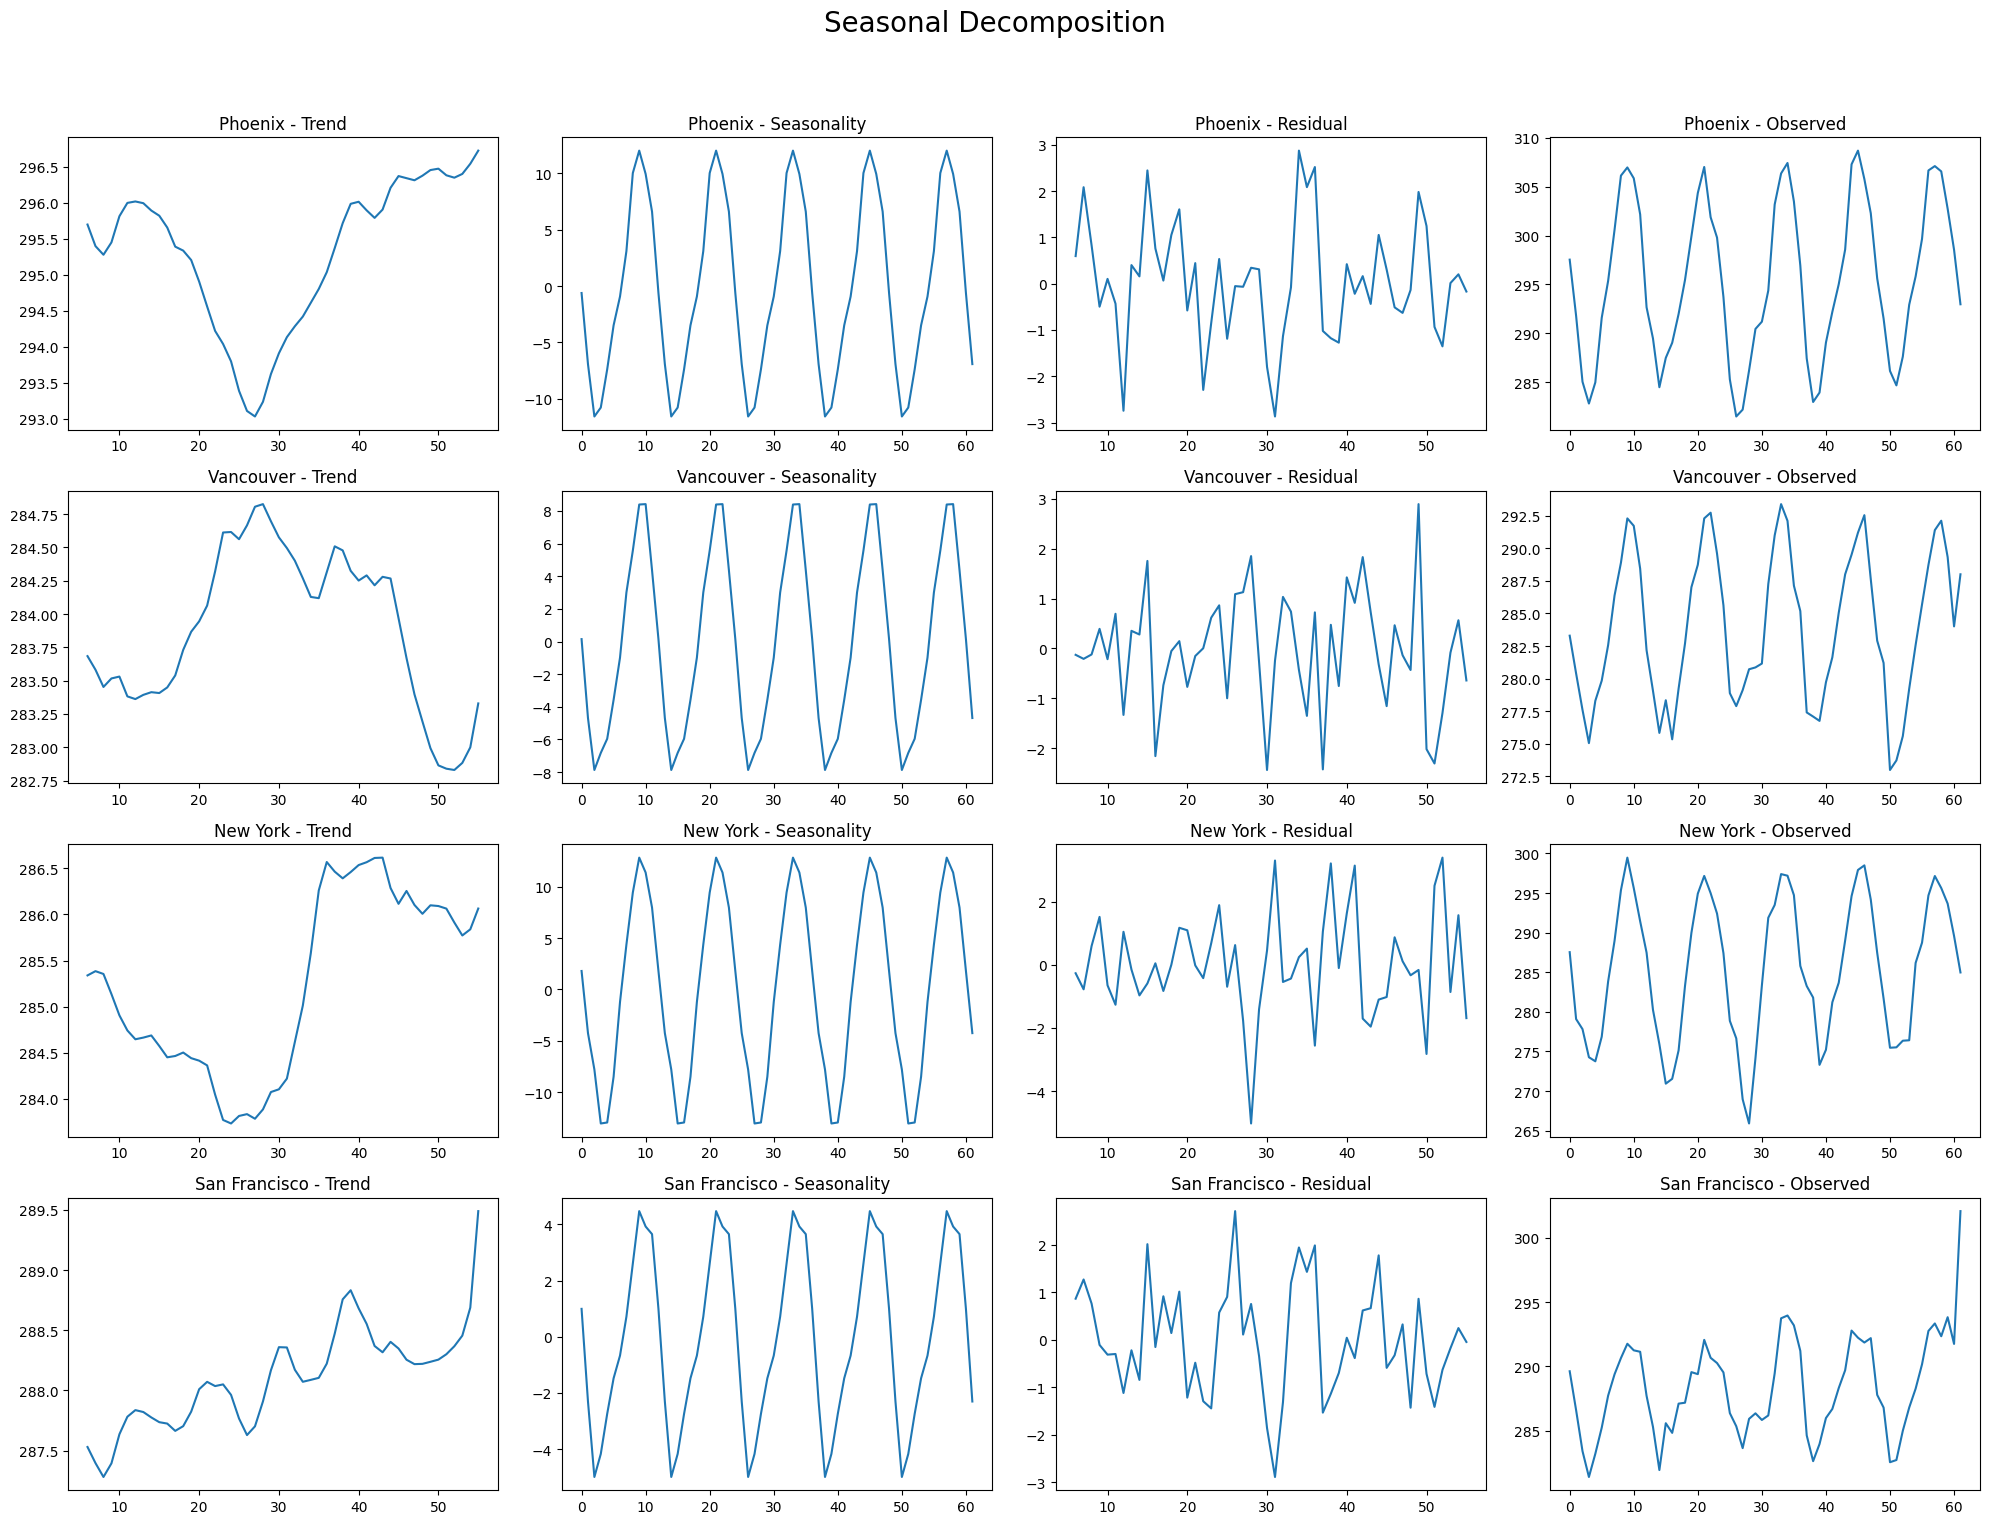

In [97]:
#Seasonal Decomposition
cities = ['Phoenix', 'Vancouver', 'New York', 'San Francisco']

# Tạo plot
fig, axes = plt.subplots(len(cities), 4, figsize=(20, 16))
fig.suptitle('Seasonal Decomposition', fontsize=20)

for i, city in enumerate(cities):
    ts = temperature[city].dropna()
    result = seasonal_decompose(ts, model='additive', period=12)

    # Vẽ từng thành phần
    result.trend.plot(ax=axes[i, 0], title=f'{city} - Trend')
    result.seasonal.plot(ax=axes[i, 1], title=f'{city} - Seasonality')
    result.resid.plot(ax=axes[i, 2], title=f'{city} - Residual')
    result.observed.plot(ax=axes[i, 3], title=f'{city} - Observed')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Wind direction


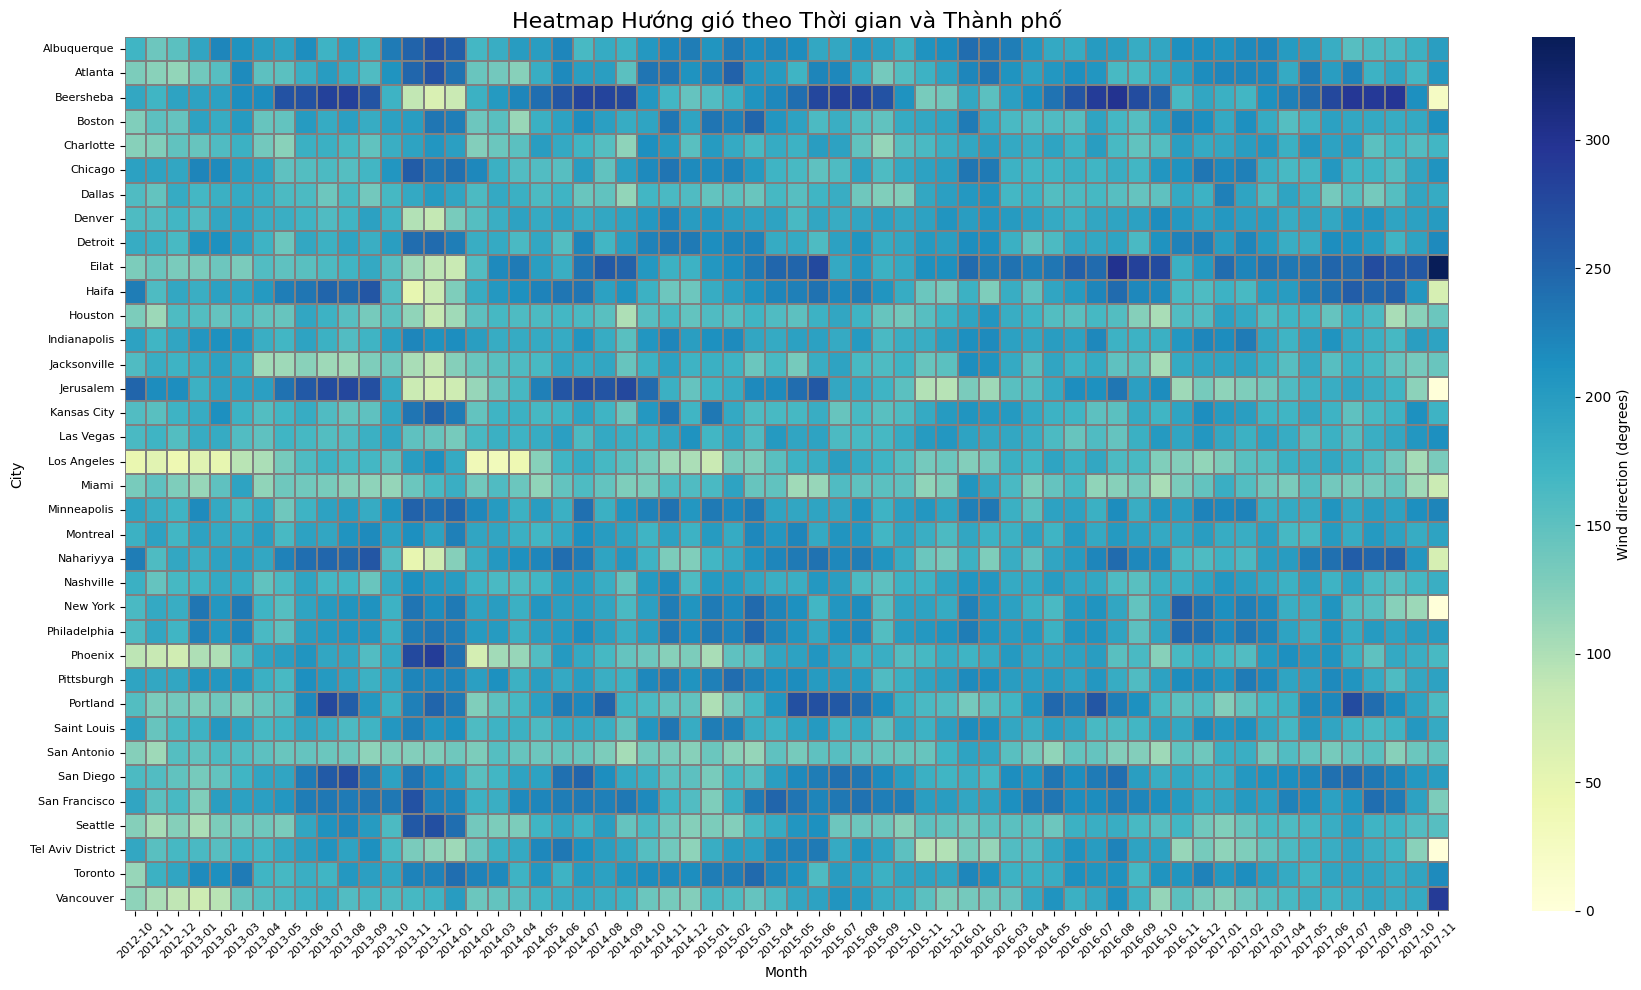

In [99]:
#Heatmap Nhiệt độ theo Thời gian và Thành phố
wind_direction_long = wind_direction.melt(id_vars='month', var_name='city', value_name='wind_direction')

heatmap_data = wind_direction_long.pivot(index='city', columns='month', values='wind_direction')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Wind direction (degrees)'}, linewidths=0.01, linecolor='gray')

plt.title("Heatmap Hướng gió theo Thời gian và Thành phố", fontsize=16)
plt.xlabel("Month")
plt.ylabel("City")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

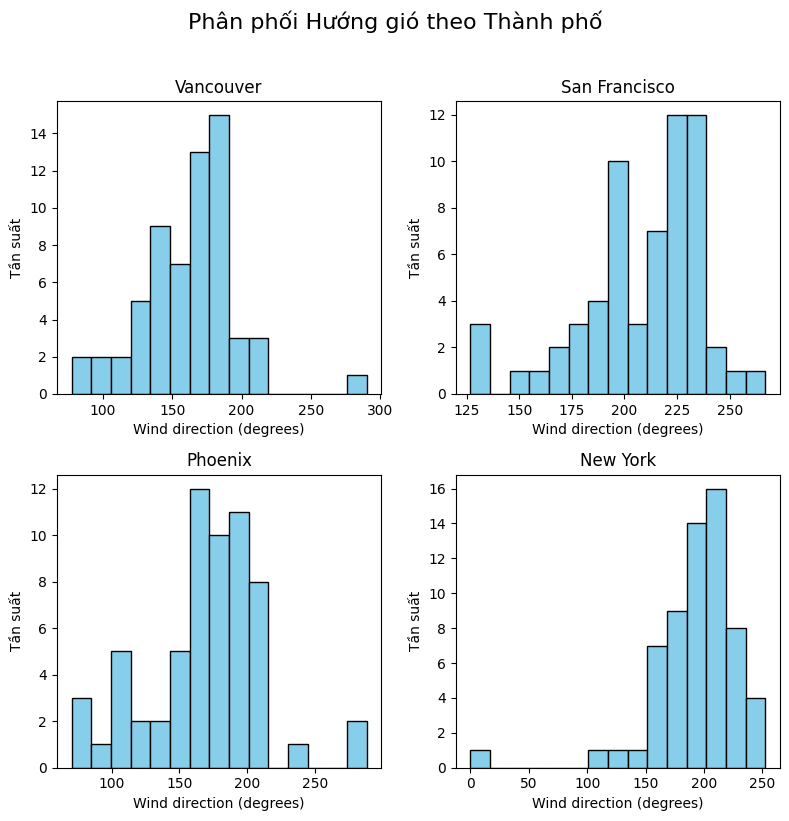

In [100]:
#Histogram
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']

plt.figure(figsize=(8, 8))
for i, city in enumerate(cities):
    plt.subplot(2, 2, i + 1)
    plt.hist(wind_direction[city], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'{city}')
    plt.xlabel('Wind direction (degrees)')
    plt.ylabel('Tần suất')

plt.suptitle('Phân phối Hướng gió theo Thành phố', fontsize=16, y=1.02)  # Tiêu đề chung
plt.tight_layout()
plt.show()

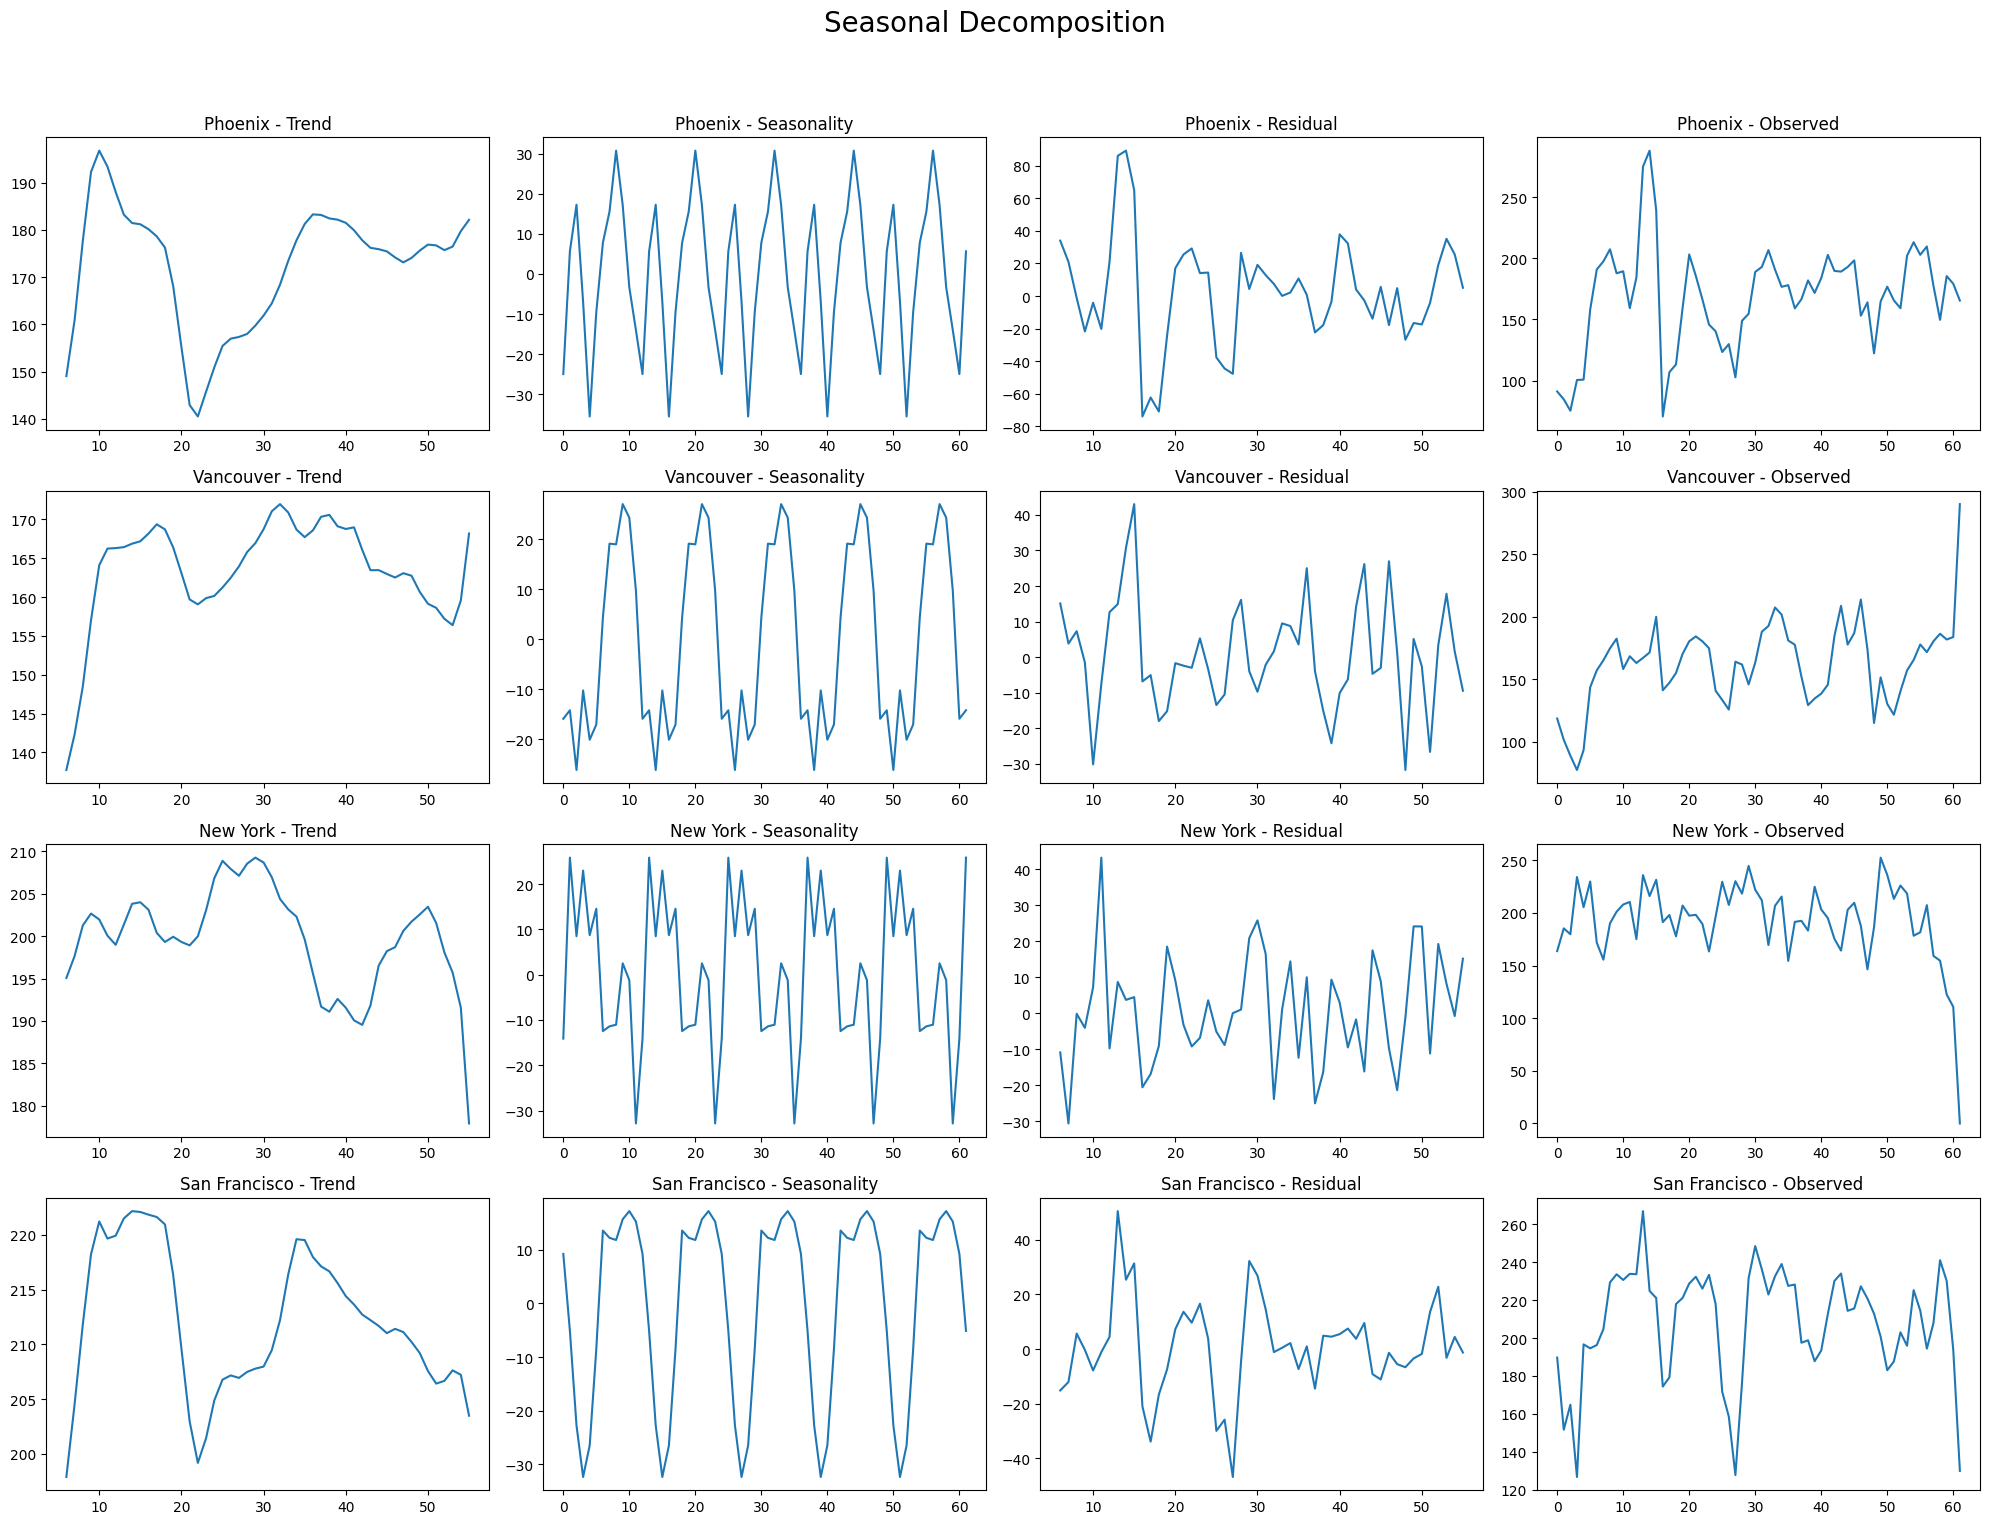

In [101]:
#Seasonal Decomposition
cities = ['Phoenix', 'Vancouver', 'New York', 'San Francisco']

# Tạo plot
fig, axes = plt.subplots(len(cities), 4, figsize=(20, 16))
fig.suptitle('Seasonal Decomposition', fontsize=20)

for i, city in enumerate(cities):
    ts = wind_direction[city].dropna()
    result = seasonal_decompose(ts, model='additive', period=12)

    # Vẽ từng thành phần
    result.trend.plot(ax=axes[i, 0], title=f'{city} - Trend')
    result.seasonal.plot(ax=axes[i, 1], title=f'{city} - Seasonality')
    result.resid.plot(ax=axes[i, 2], title=f'{city} - Residual')
    result.observed.plot(ax=axes[i, 3], title=f'{city} - Observed')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Wind speed

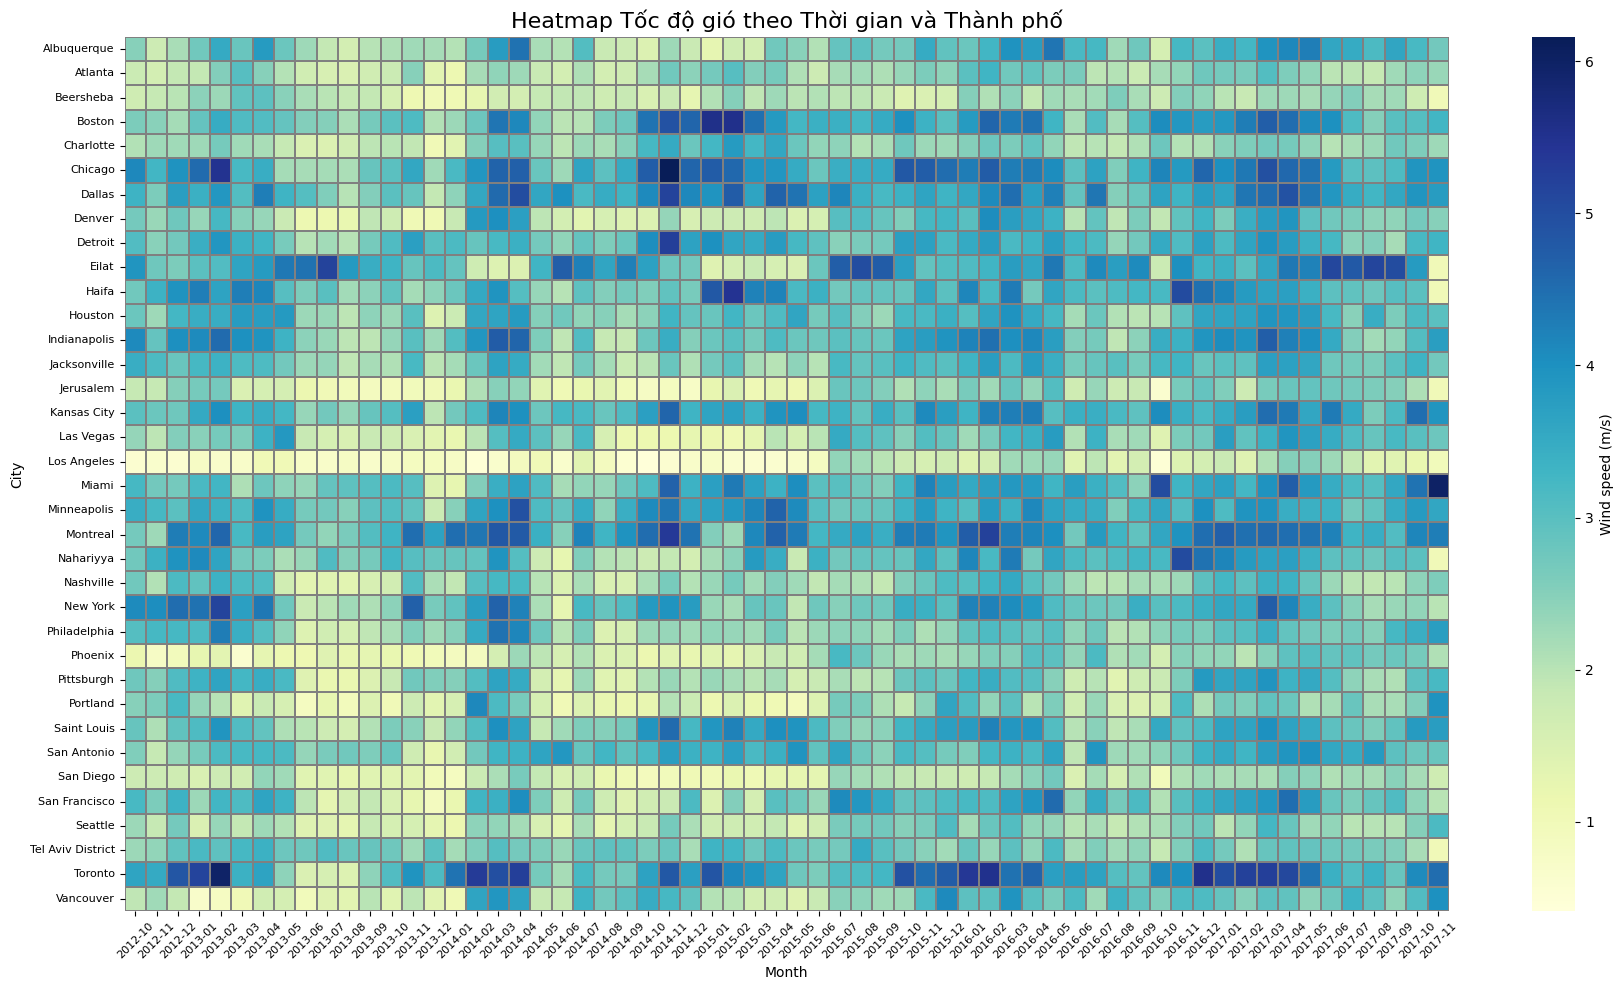

In [102]:
#Heatmap Nhiệt độ theo Thời gian và Thành phố
wind_speed_long = wind_speed.melt(id_vars='month', var_name='city', value_name='wind_speed')

heatmap_data = wind_speed_long.pivot(index='city', columns='month', values='wind_speed')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Wind speed (m/s)'}, linewidths=0.01, linecolor='gray')

plt.title("Heatmap Tốc độ gió theo Thời gian và Thành phố", fontsize=16)
plt.xlabel("Month")
plt.ylabel("City")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

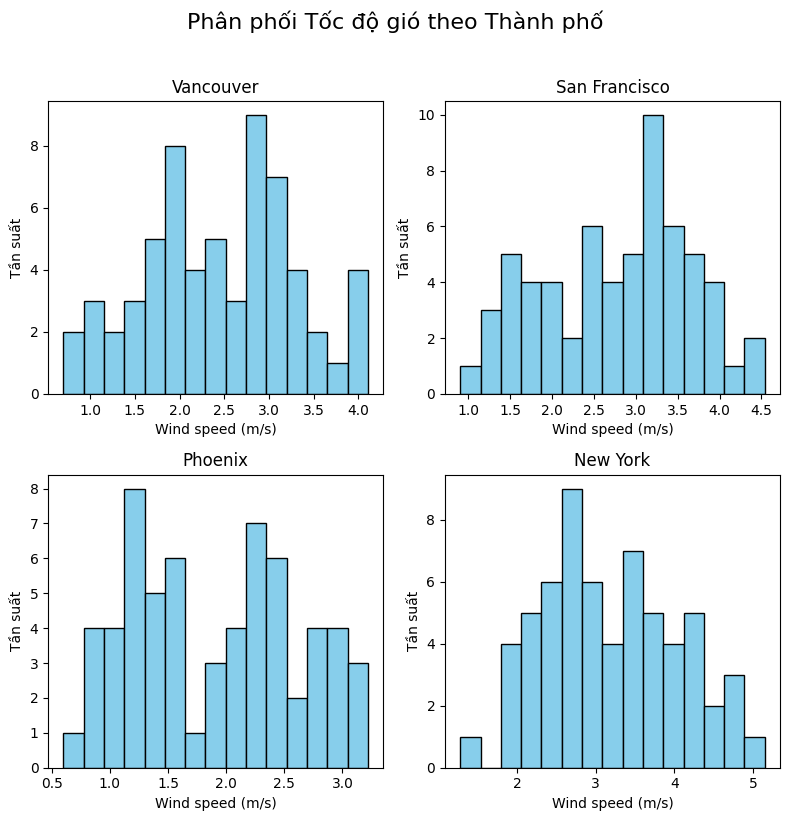

In [103]:
#Histogram
cities = ['Vancouver', 'San Francisco', 'Phoenix', 'New York']

plt.figure(figsize=(8, 8))
for i, city in enumerate(cities):
    plt.subplot(2, 2, i + 1)
    plt.hist(wind_speed[city], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'{city}')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Tần suất')

plt.suptitle('Phân phối Tốc độ gió theo Thành phố', fontsize=16, y=1.02)  # Tiêu đề chung
plt.tight_layout()
plt.show()

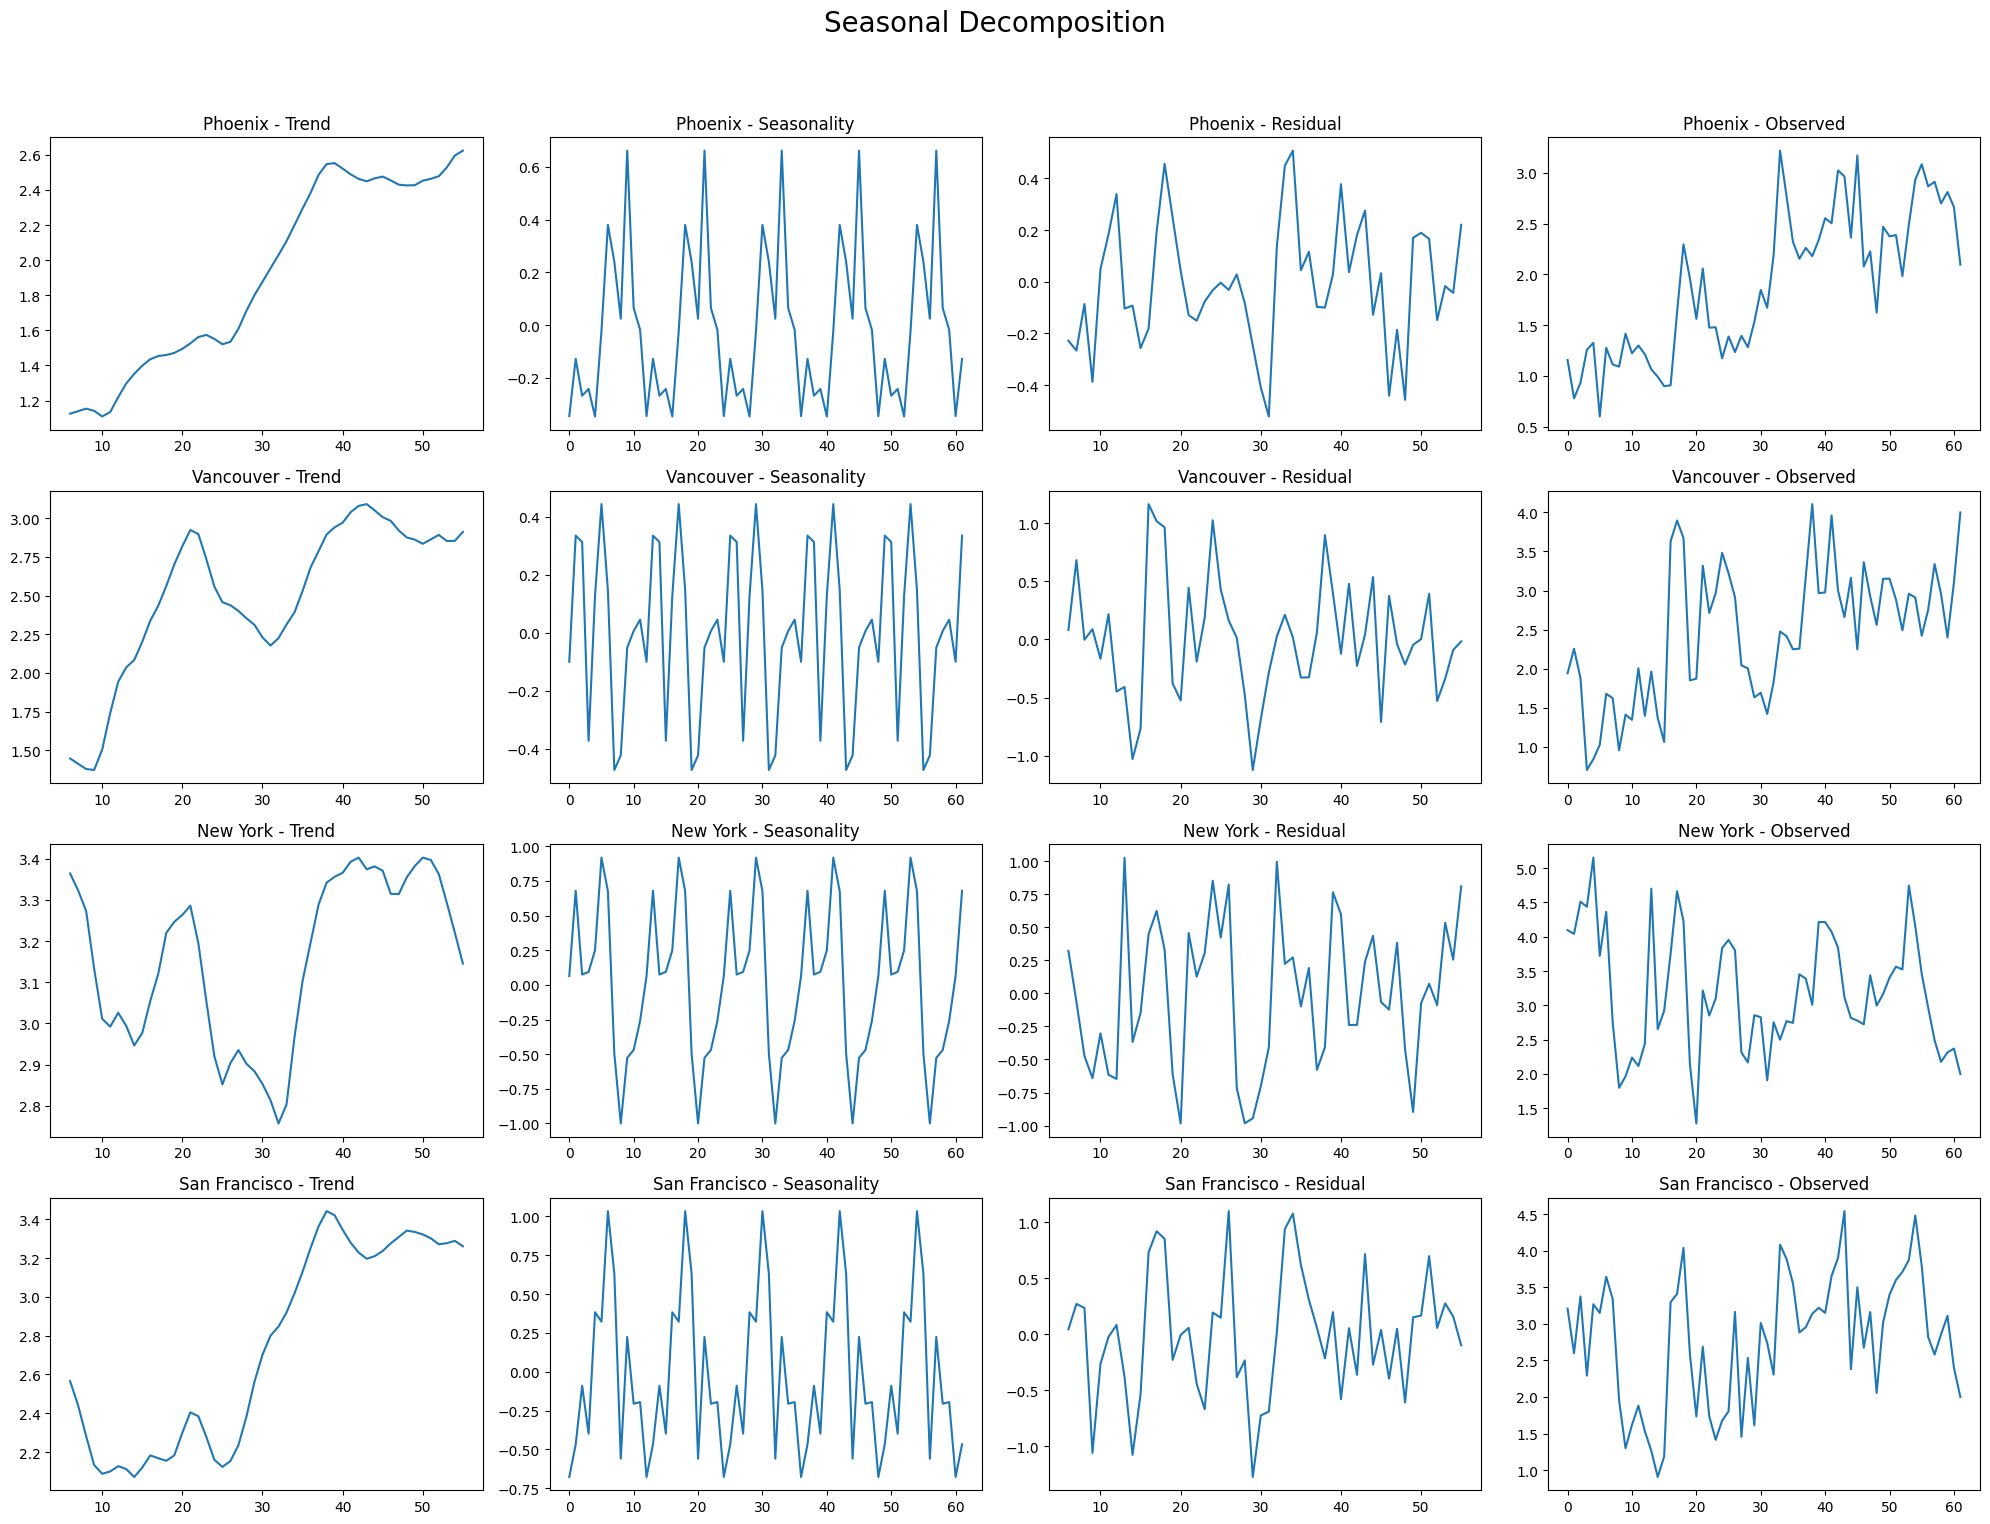

In [104]:
#Seasonal Decomposition
cities = ['Phoenix', 'Vancouver', 'New York', 'San Francisco']

# Tạo plot
fig, axes = plt.subplots(len(cities), 4, figsize=(20, 16))
fig.suptitle('Seasonal Decomposition', fontsize=20)

for i, city in enumerate(cities):
    ts = wind_speed[city].dropna()
    result = seasonal_decompose(ts, model='additive', period=12)

    # Vẽ từng thành phần
    result.trend.plot(ax=axes[i, 0], title=f'{city} - Trend')
    result.seasonal.plot(ax=axes[i, 1], title=f'{city} - Seasonality')
    result.resid.plot(ax=axes[i, 2], title=f'{city} - Residual')
    result.observed.plot(ax=axes[i, 3], title=f'{city} - Observed')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### CORRELATION ANALYSIS

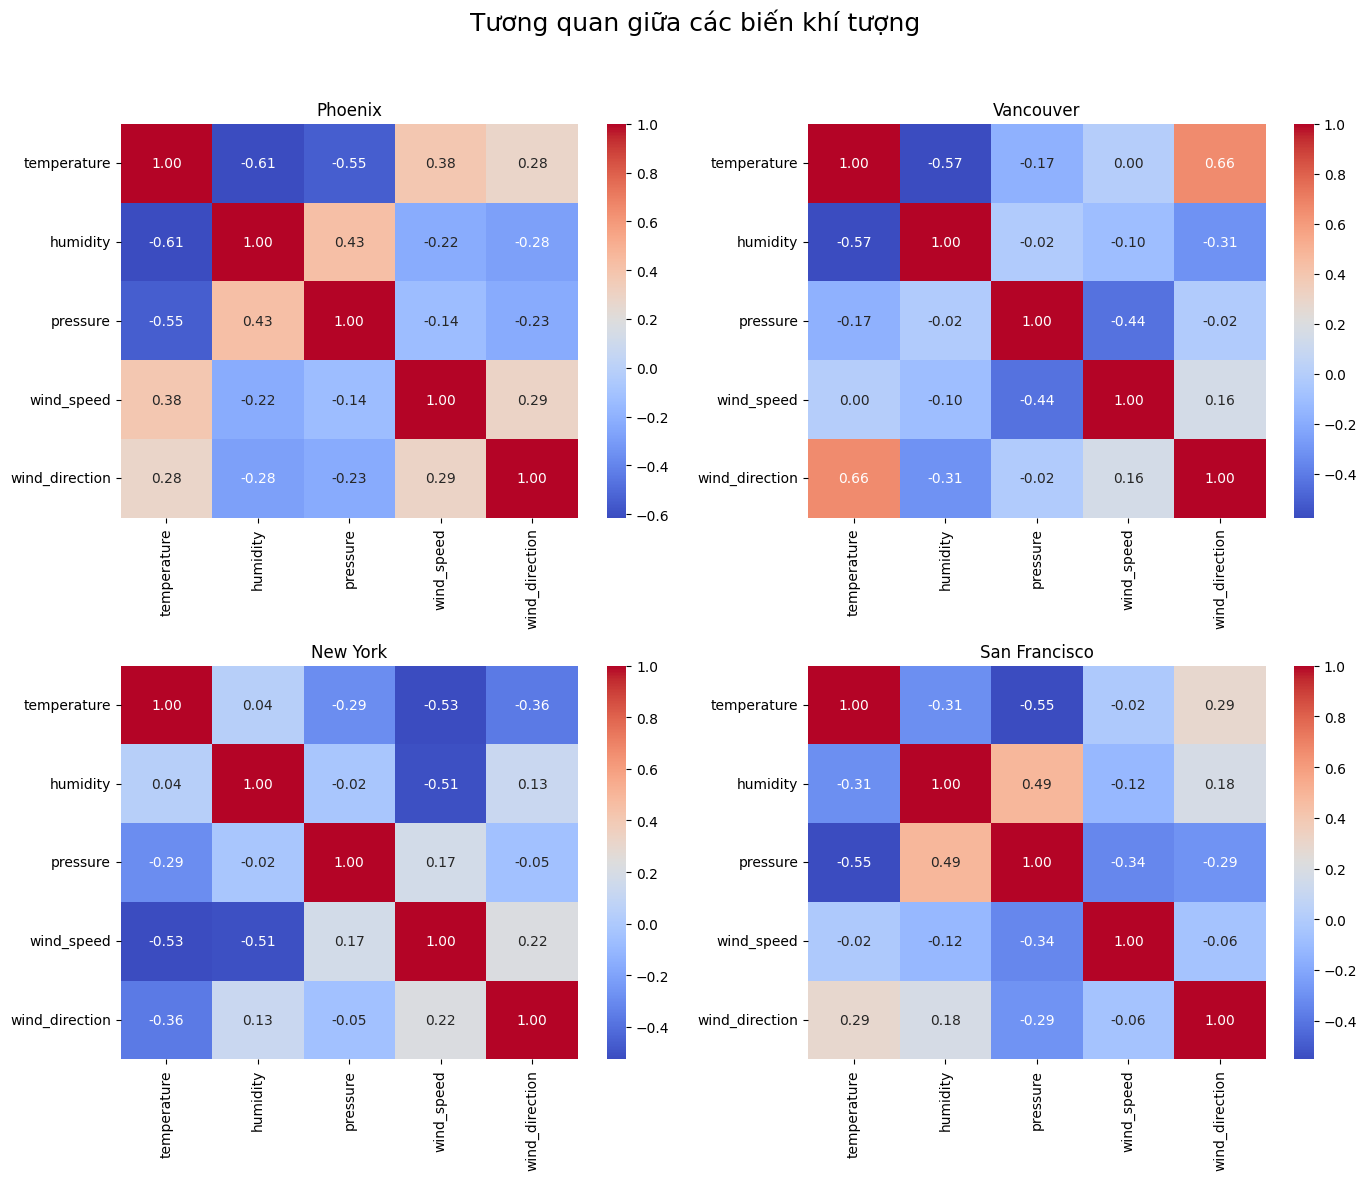

In [110]:
#Tương quan giữa các biến khí tượng
cities = ['Phoenix', 'Vancouver', 'New York', 'San Francisco']

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

for i, city in enumerate(cities):
    df = pd.DataFrame({
        "temperature": temperature[city],
        "humidity": humidity[city],
        "pressure": pressure[city],
        "wind_speed": wind_speed[city],
        "wind_direction": wind_direction[city]
    })

    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axs[i])
    axs[i].set_title(city)

# Supertitle chung
plt.suptitle("Tương quan giữa các biến khí tượng", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()